# TF-IDF & Word2Vec Analysis

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
#import word2vec
from gensim.models import Word2Vec

In [2]:
#setting sns options
#default figure size
sns.set(rc={'figure.figsize': (30, 15)})

#color palette
#sns.set_palette('Paired')
sns.color_palette('magma', as_cmap=True)

#other
sns.set_context('paper')
sns.set_style('ticks') 
sns.axes_style('ticks')

# Display settings
plt.rcParams.update({'axes.labelsize': 'large', 'axes.titlesize': 'large'})

## TF-IDF Analysis

In [3]:
#load data set
df = pd.read_csv('../results/tfidf_enriched.csv').drop('Unnamed: 0', axis=1)
df.head(5)

,Filename,Top 10 TF-IDF Words,Year,Region
0,fran_q1_2011.txt,"[('border', 0.34642789292616993), ('detection'...",2011,Global
1,afic_2017.txt,"[('afic', 0.49029092129688284), ('niger', 0.25...",2017,Africa
2,2023.11.16_frontex-general-industry-days-innov...,"[('industry', 0.3508179021509025), ('innovatio...",2023,Other
3,ara-2022-public-web.txt,"[('border', 0.34045937196548115), ('eu', 0.267...",2022,Other
4,afic_2016.txt,"[('afic', 0.5395538529664771), ('niger', 0.193...",2016,Africa


### TF-IDF Scores per Region

#### One Barplot per Region

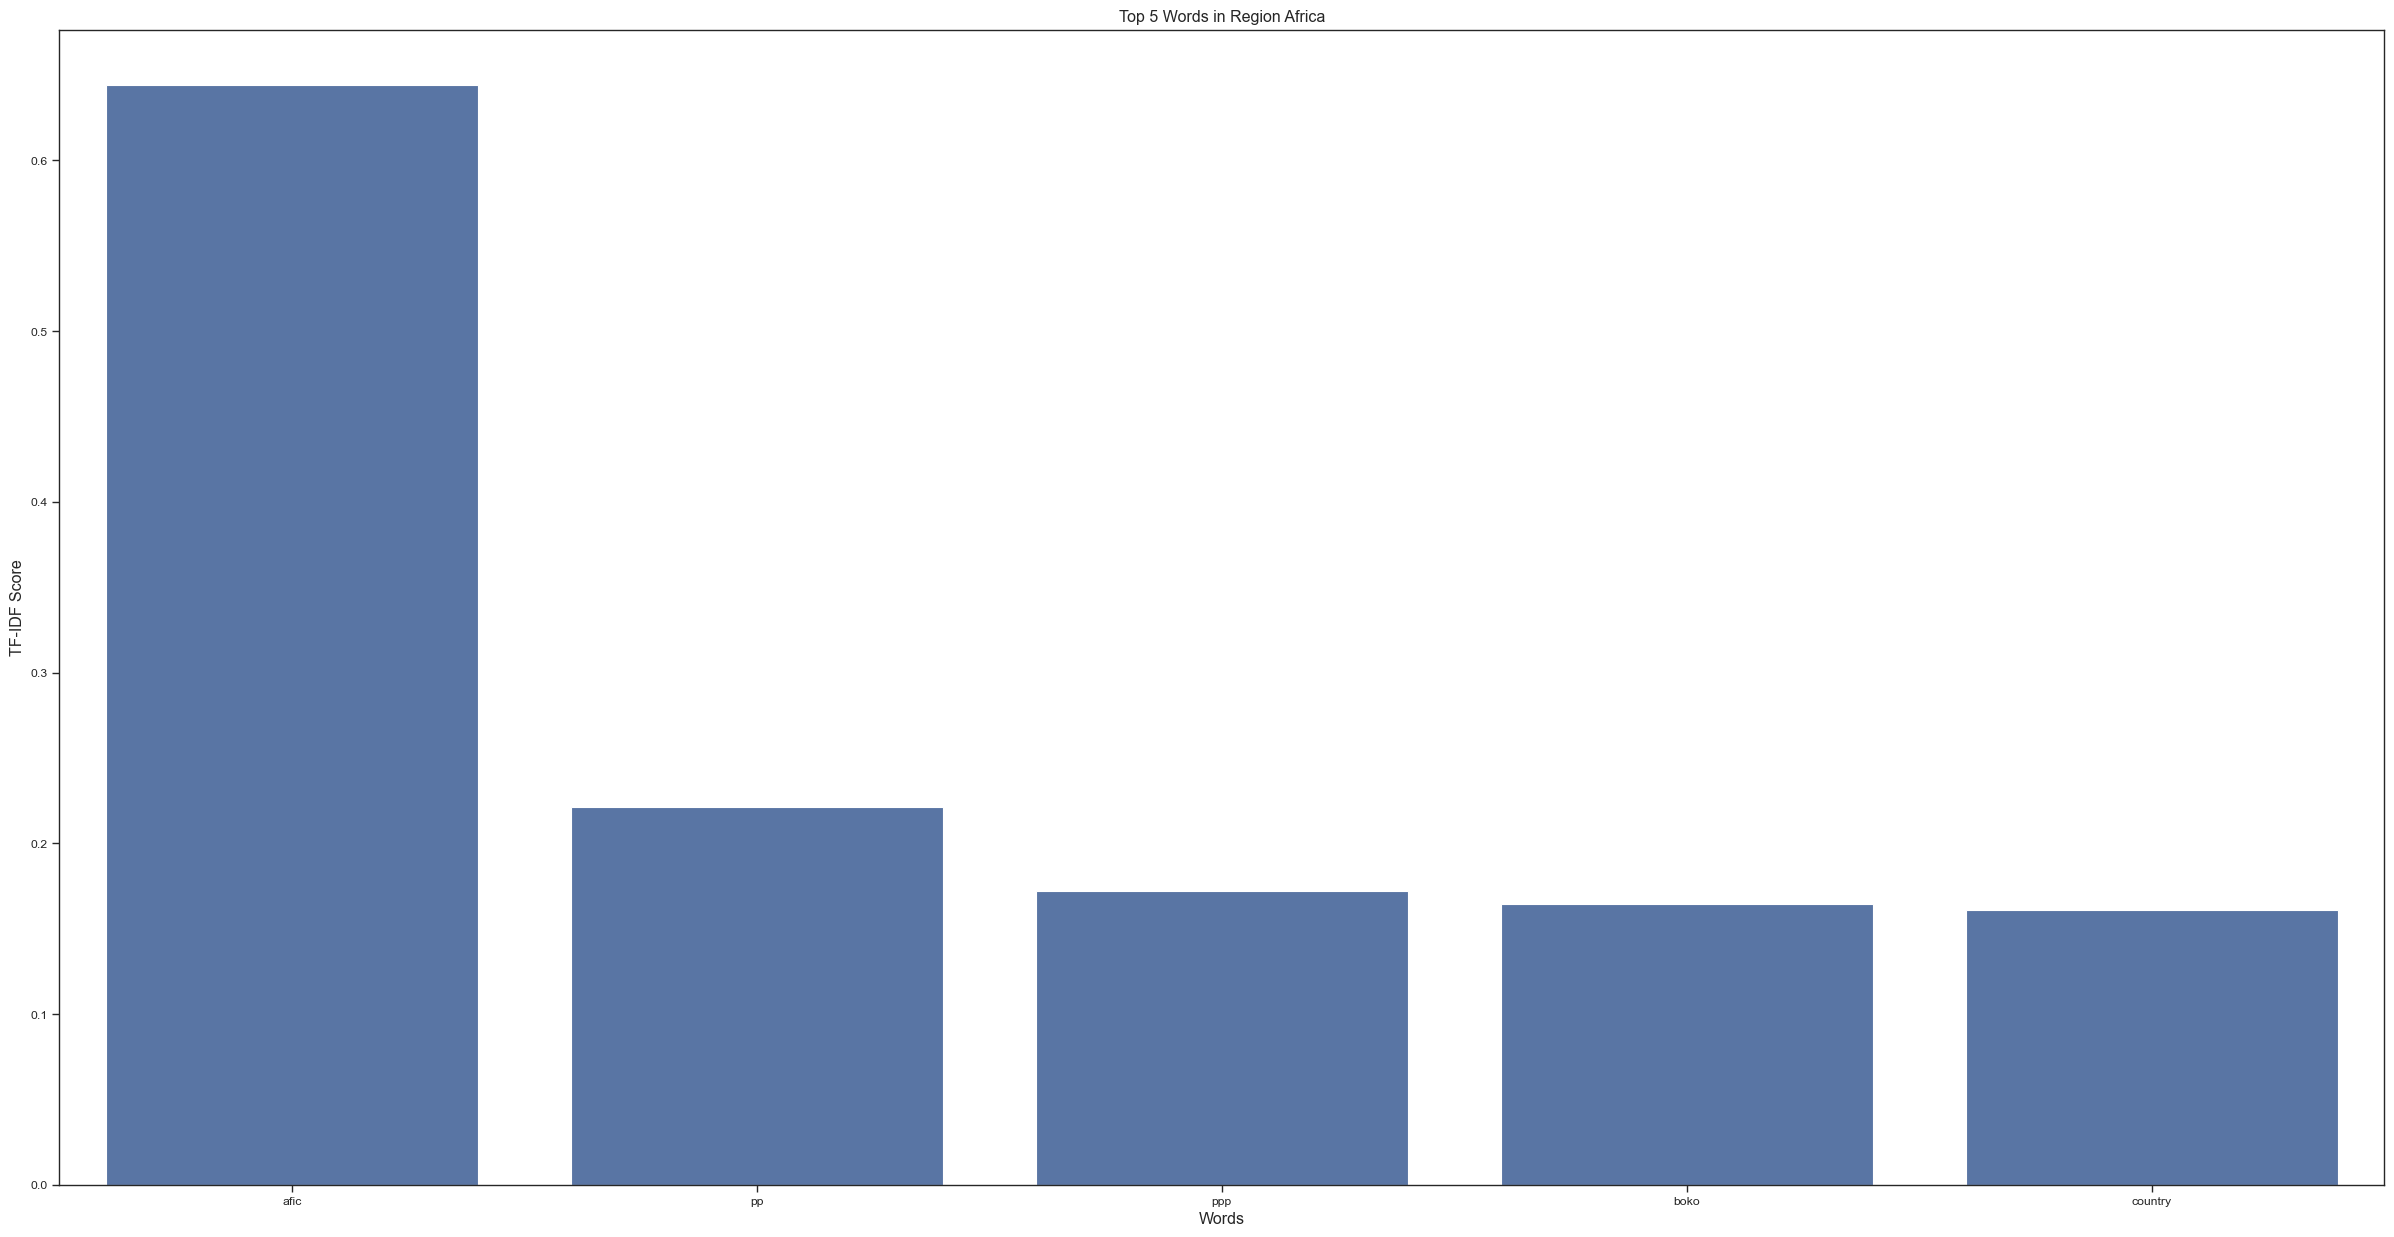

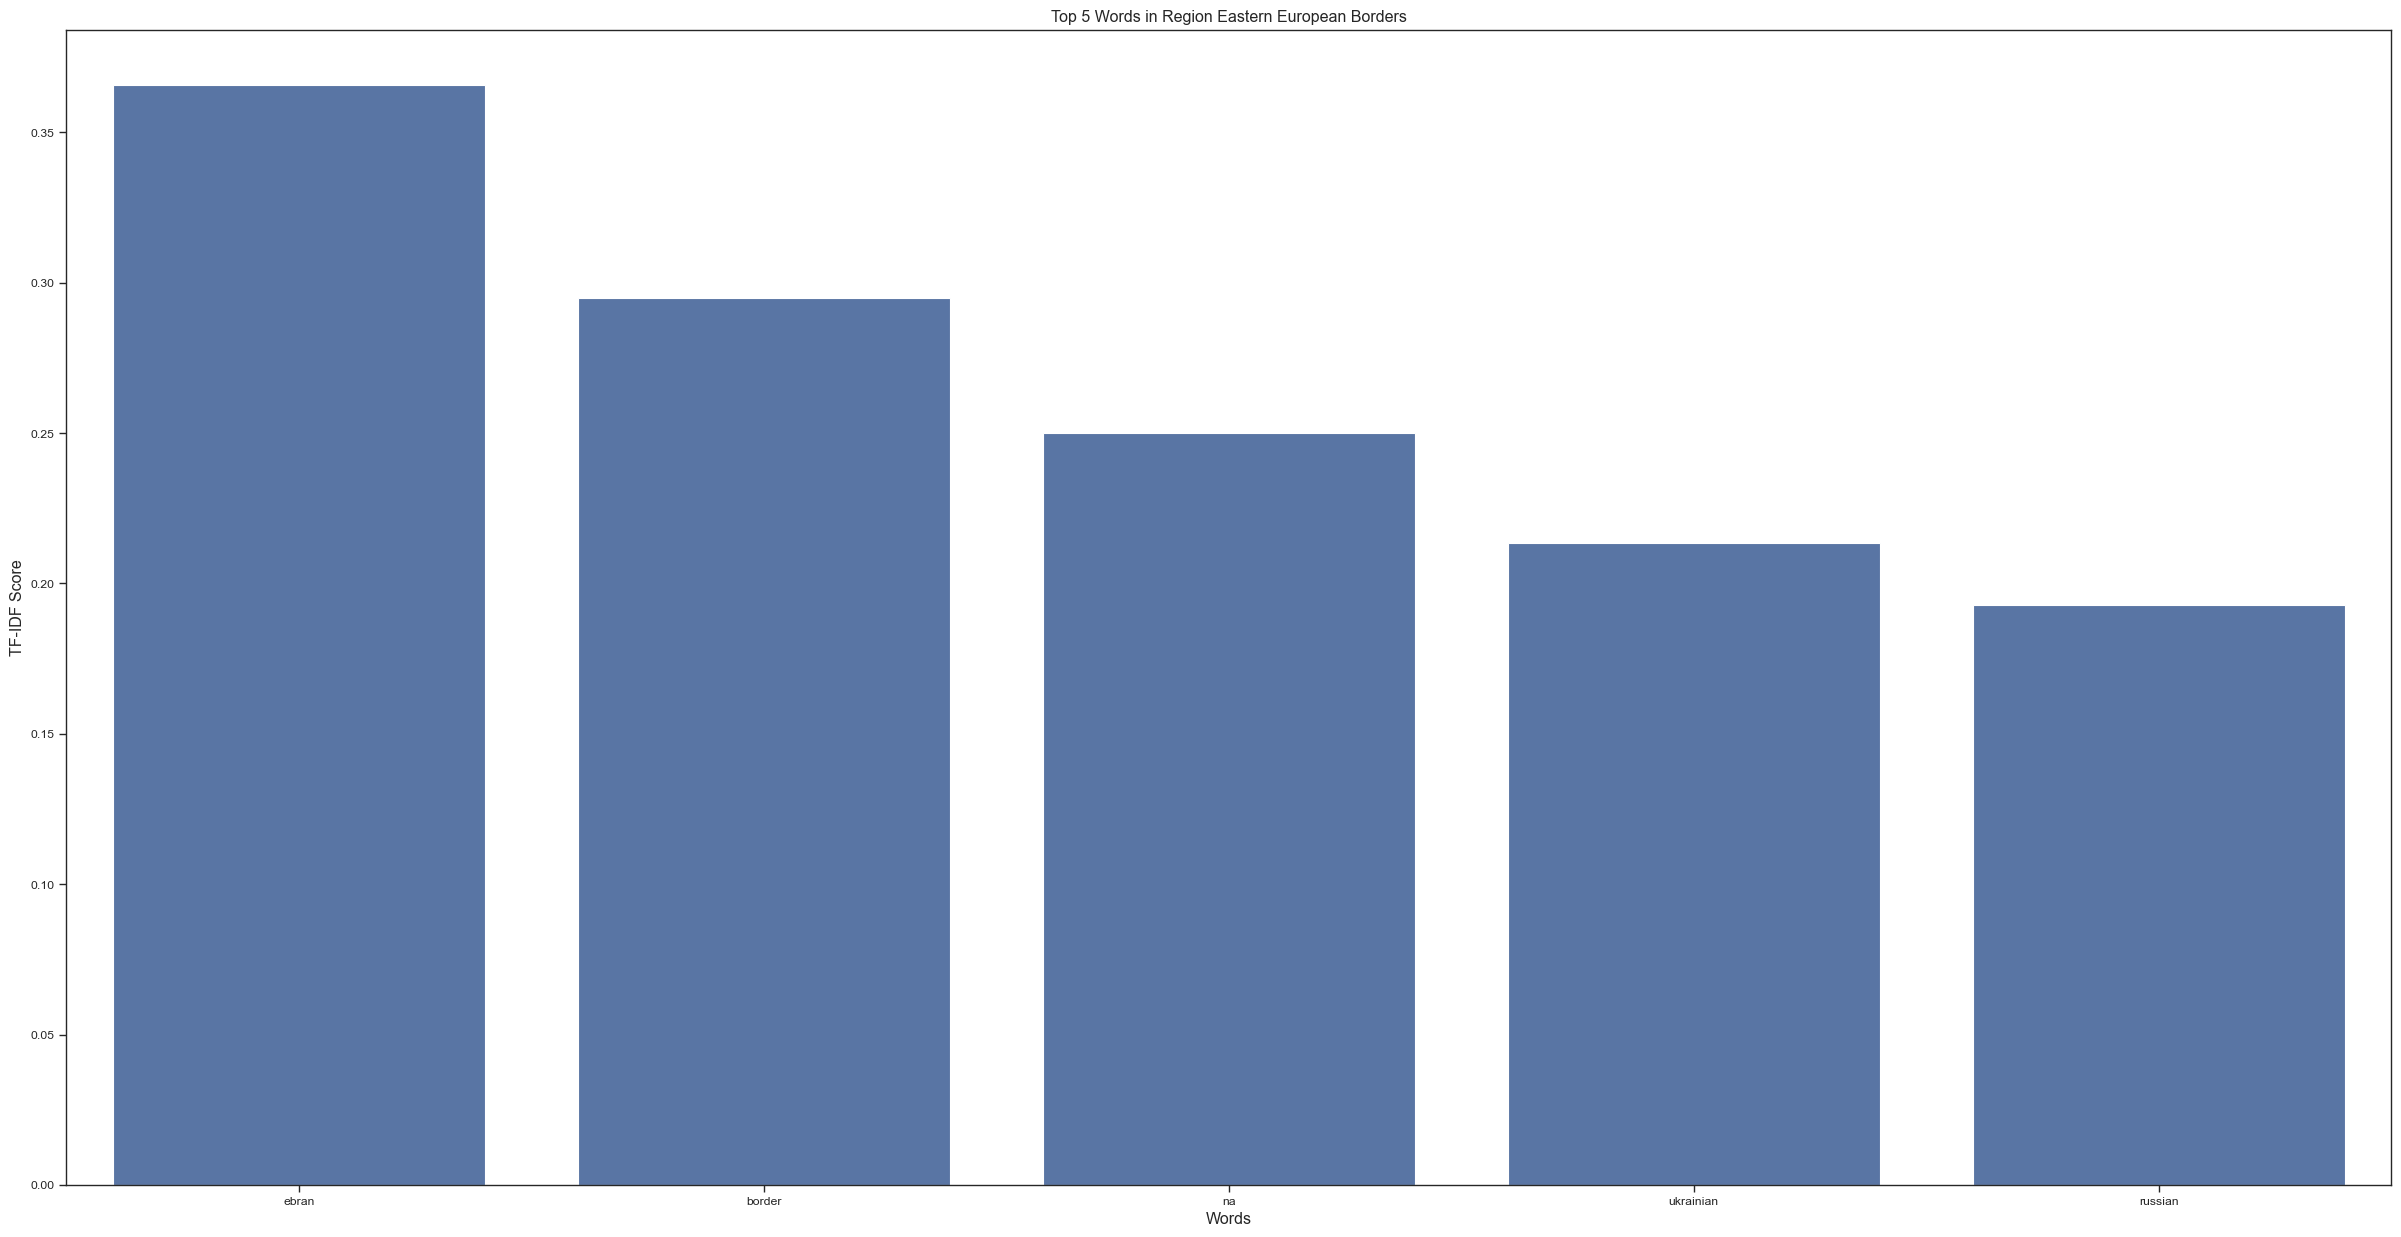

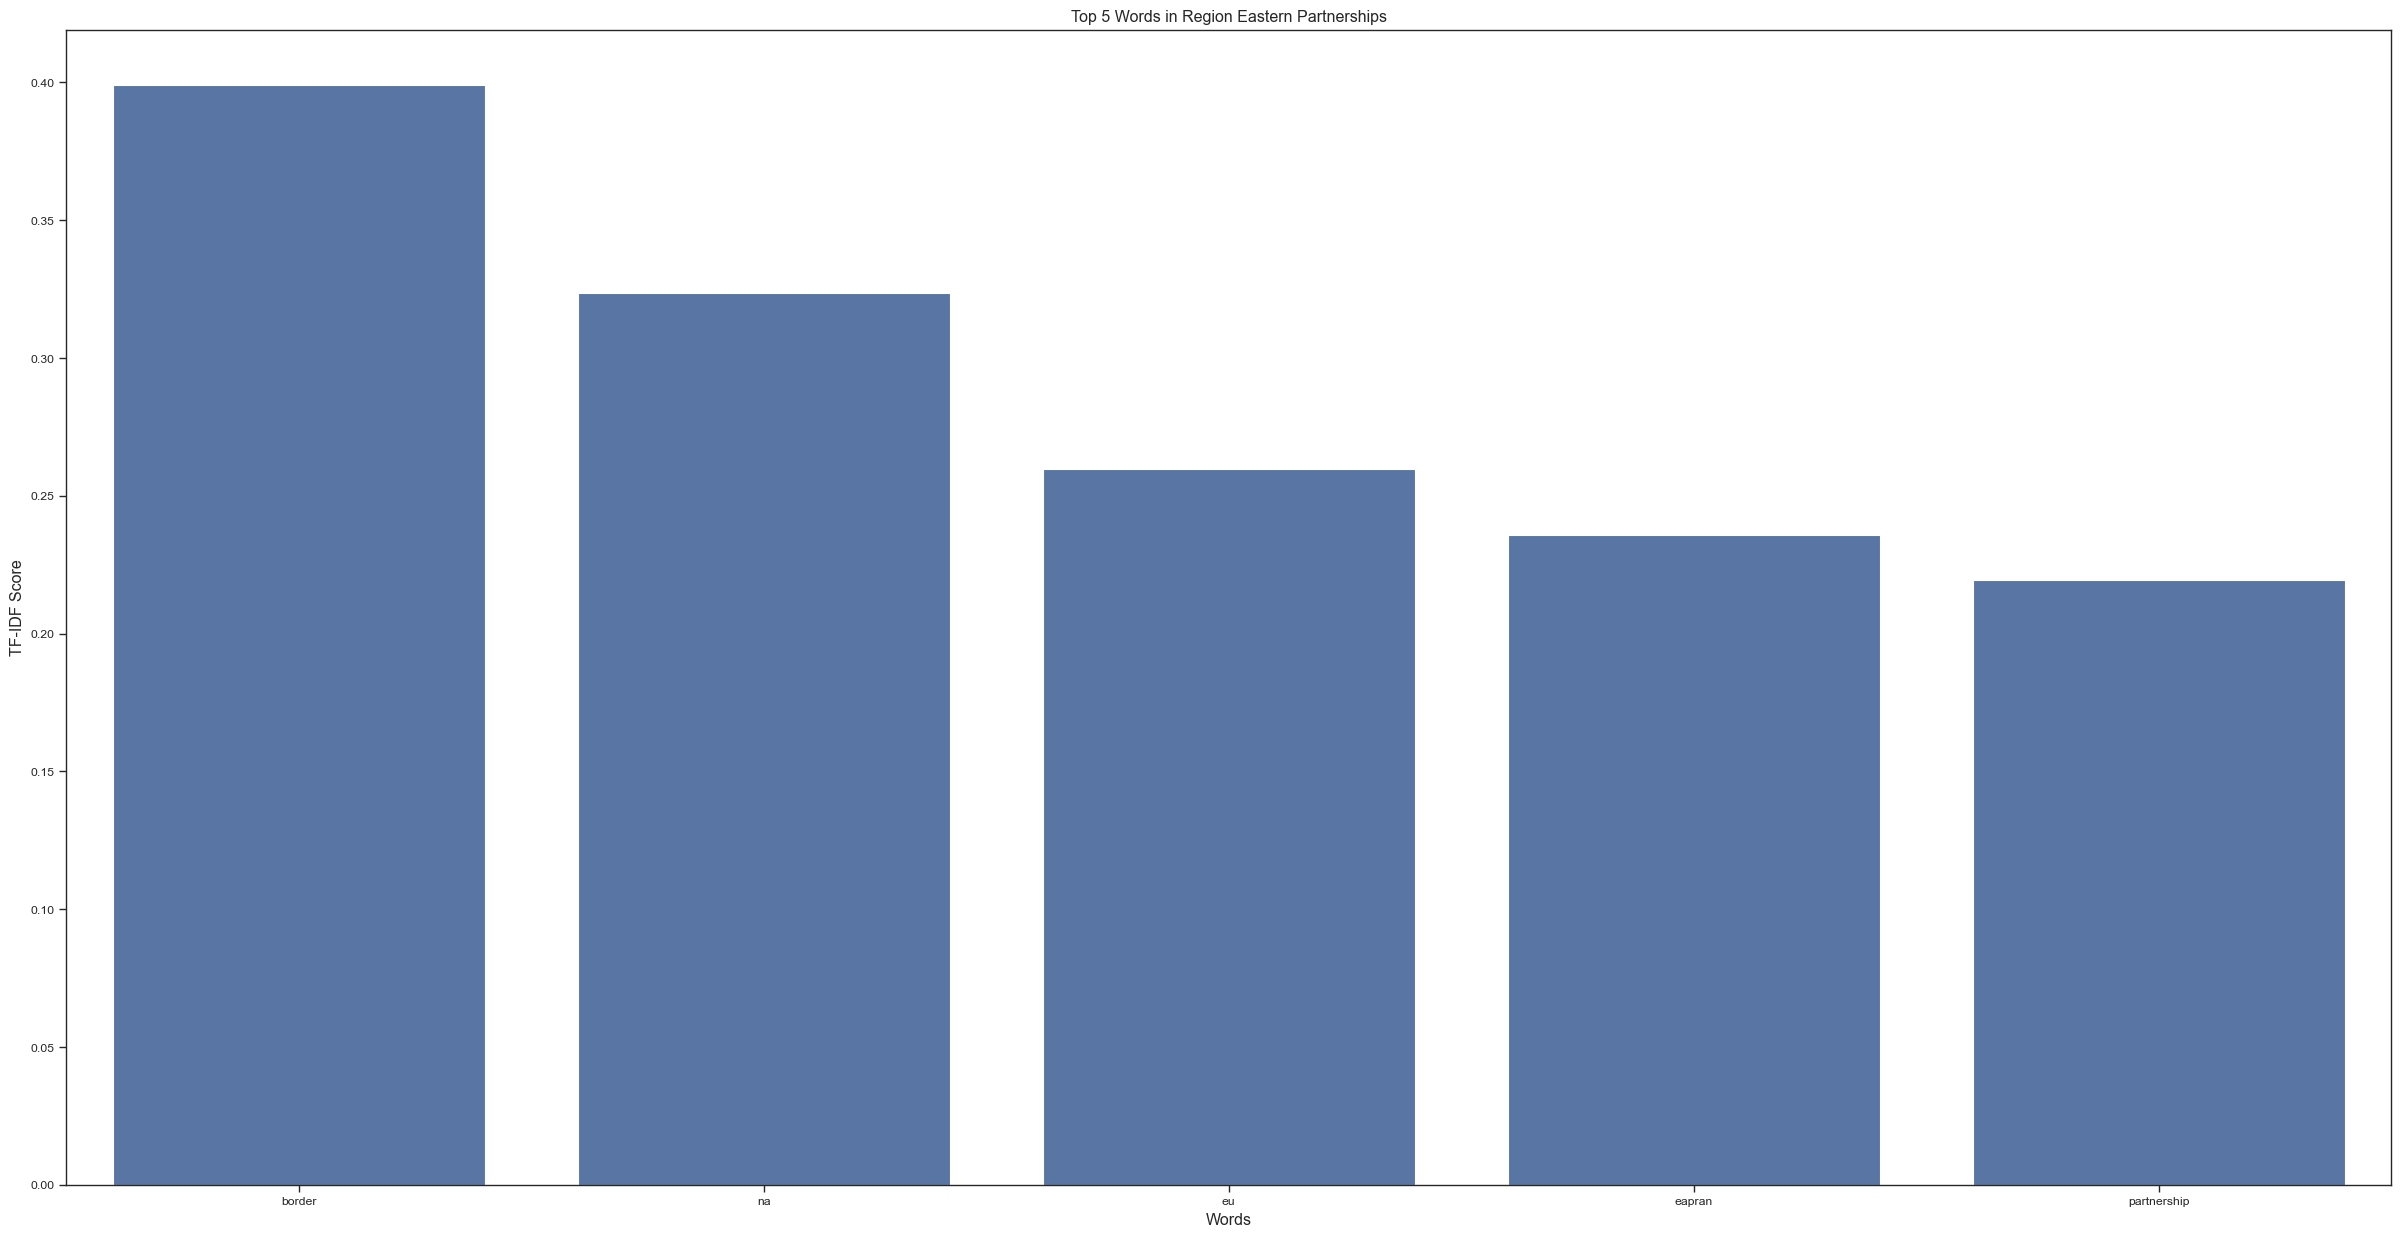

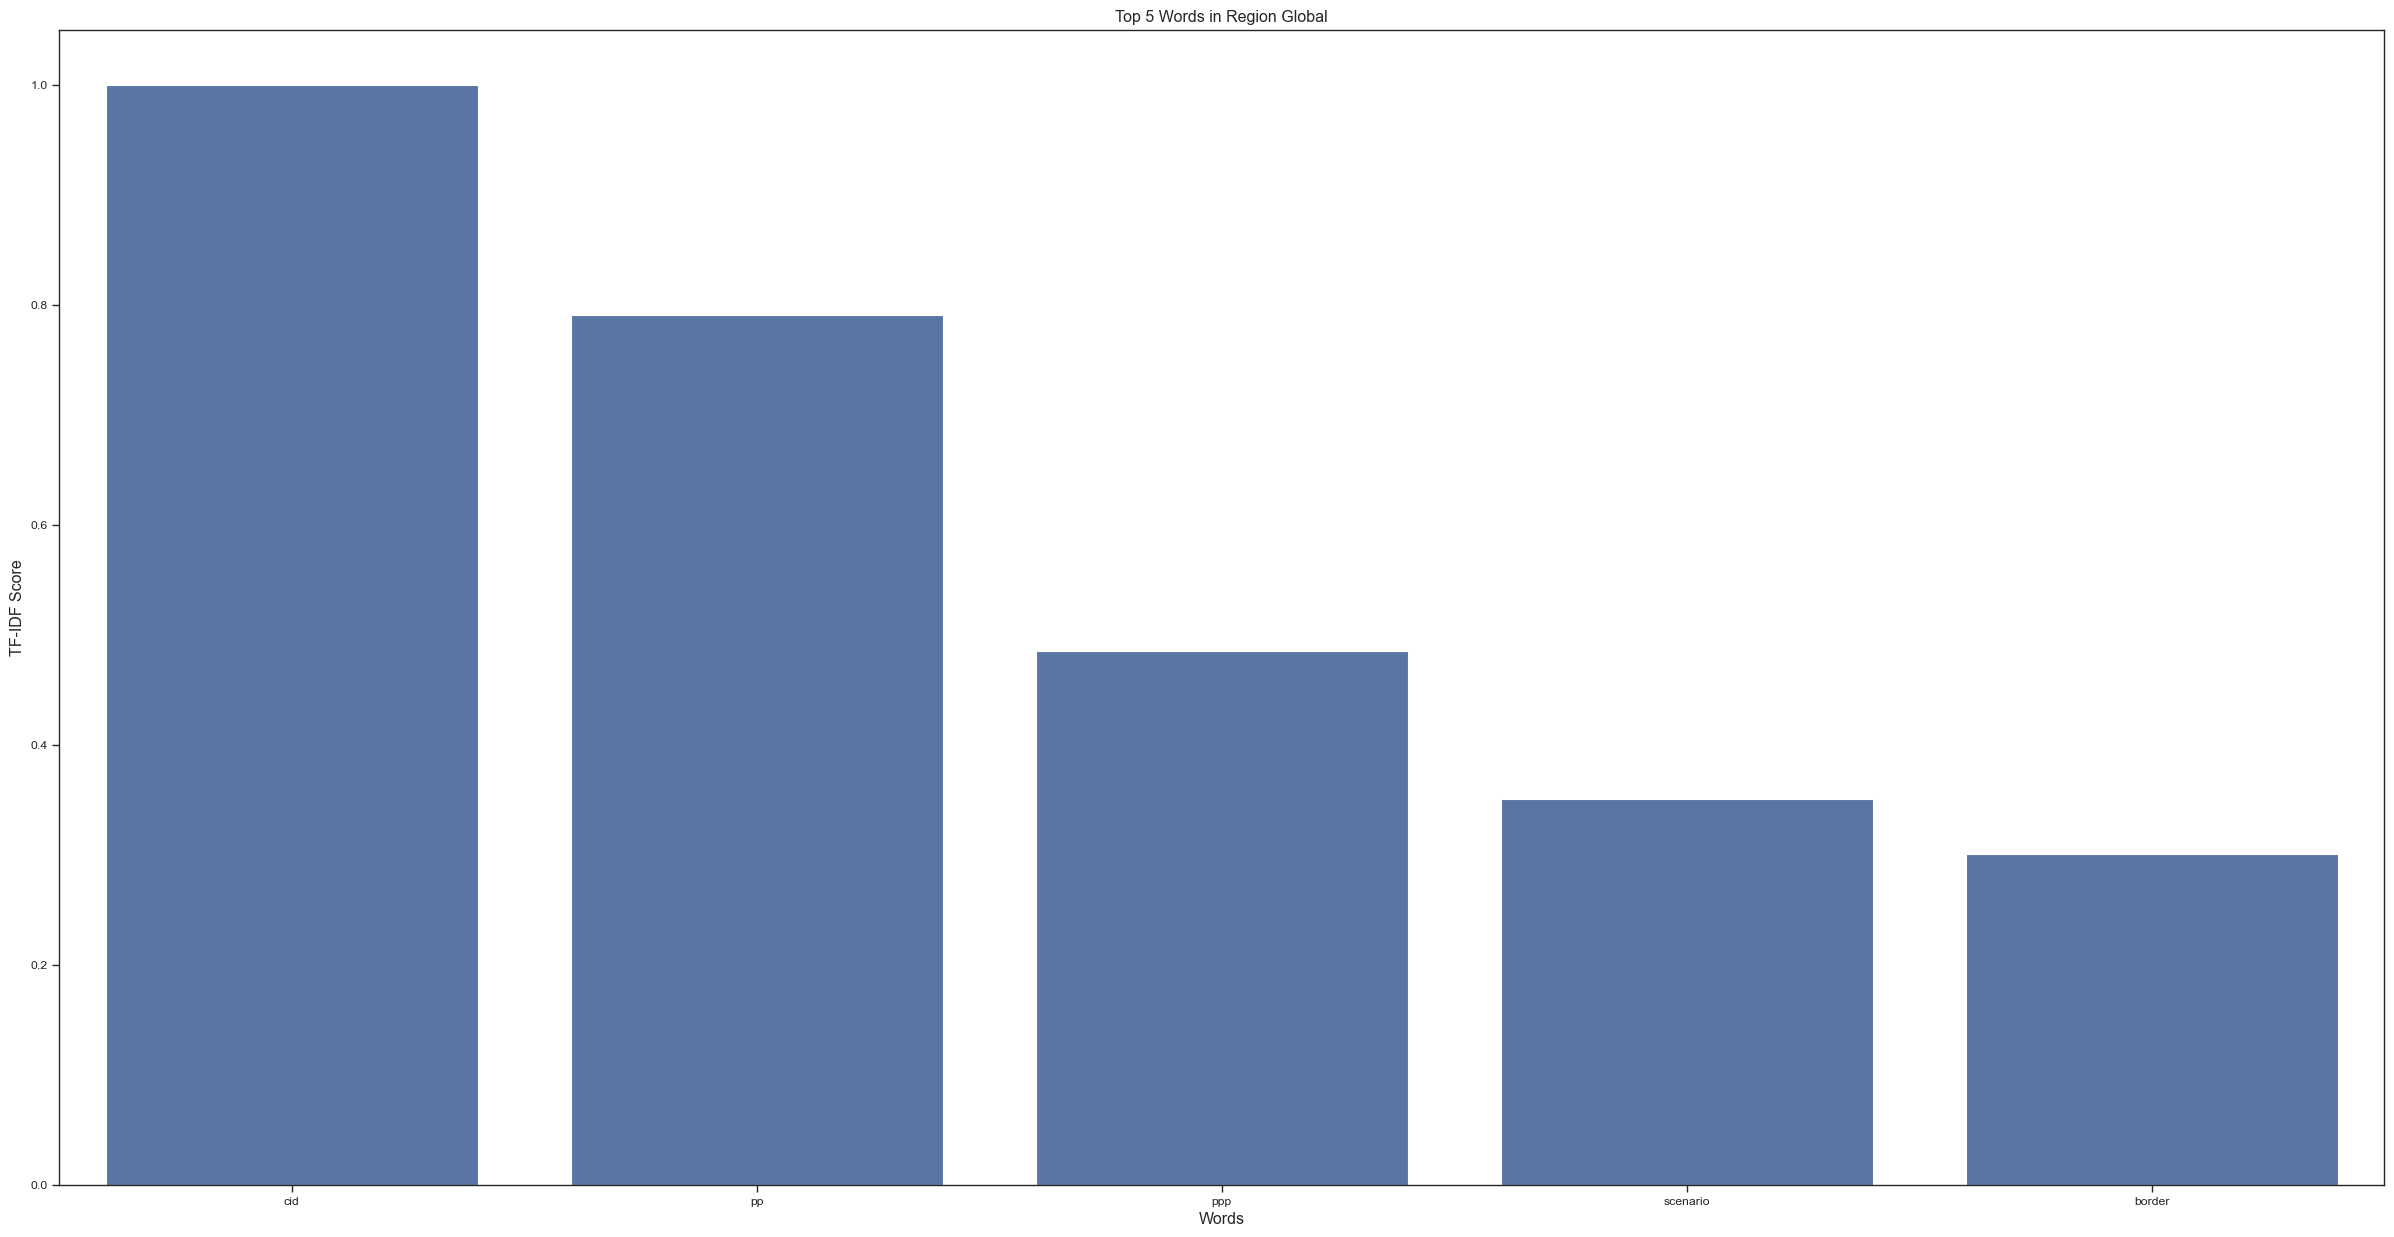

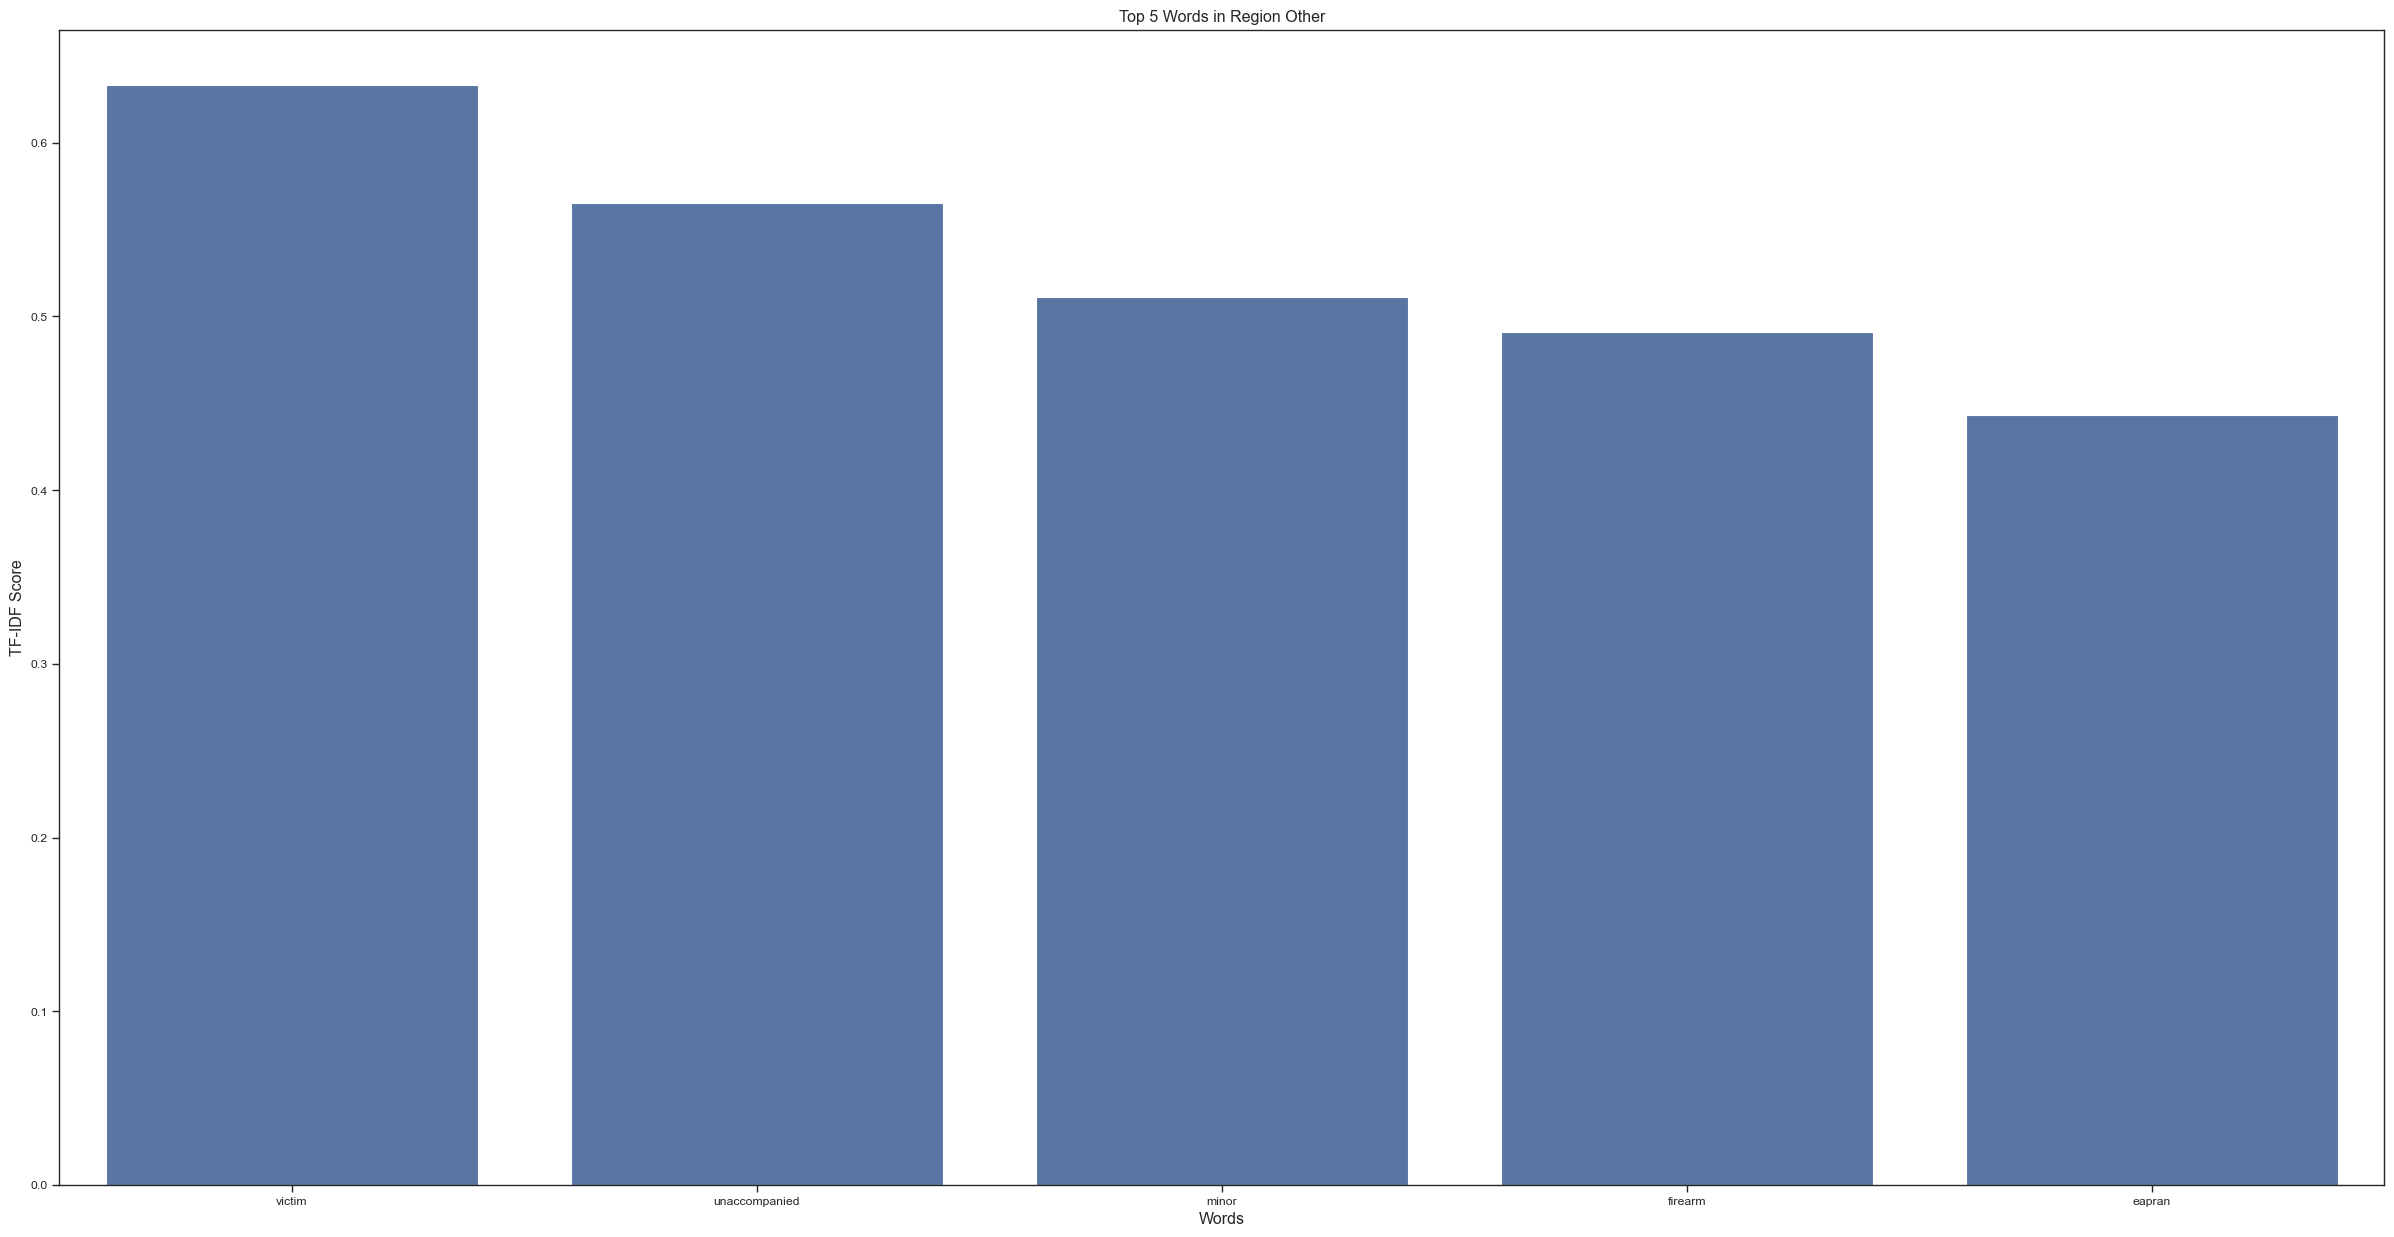

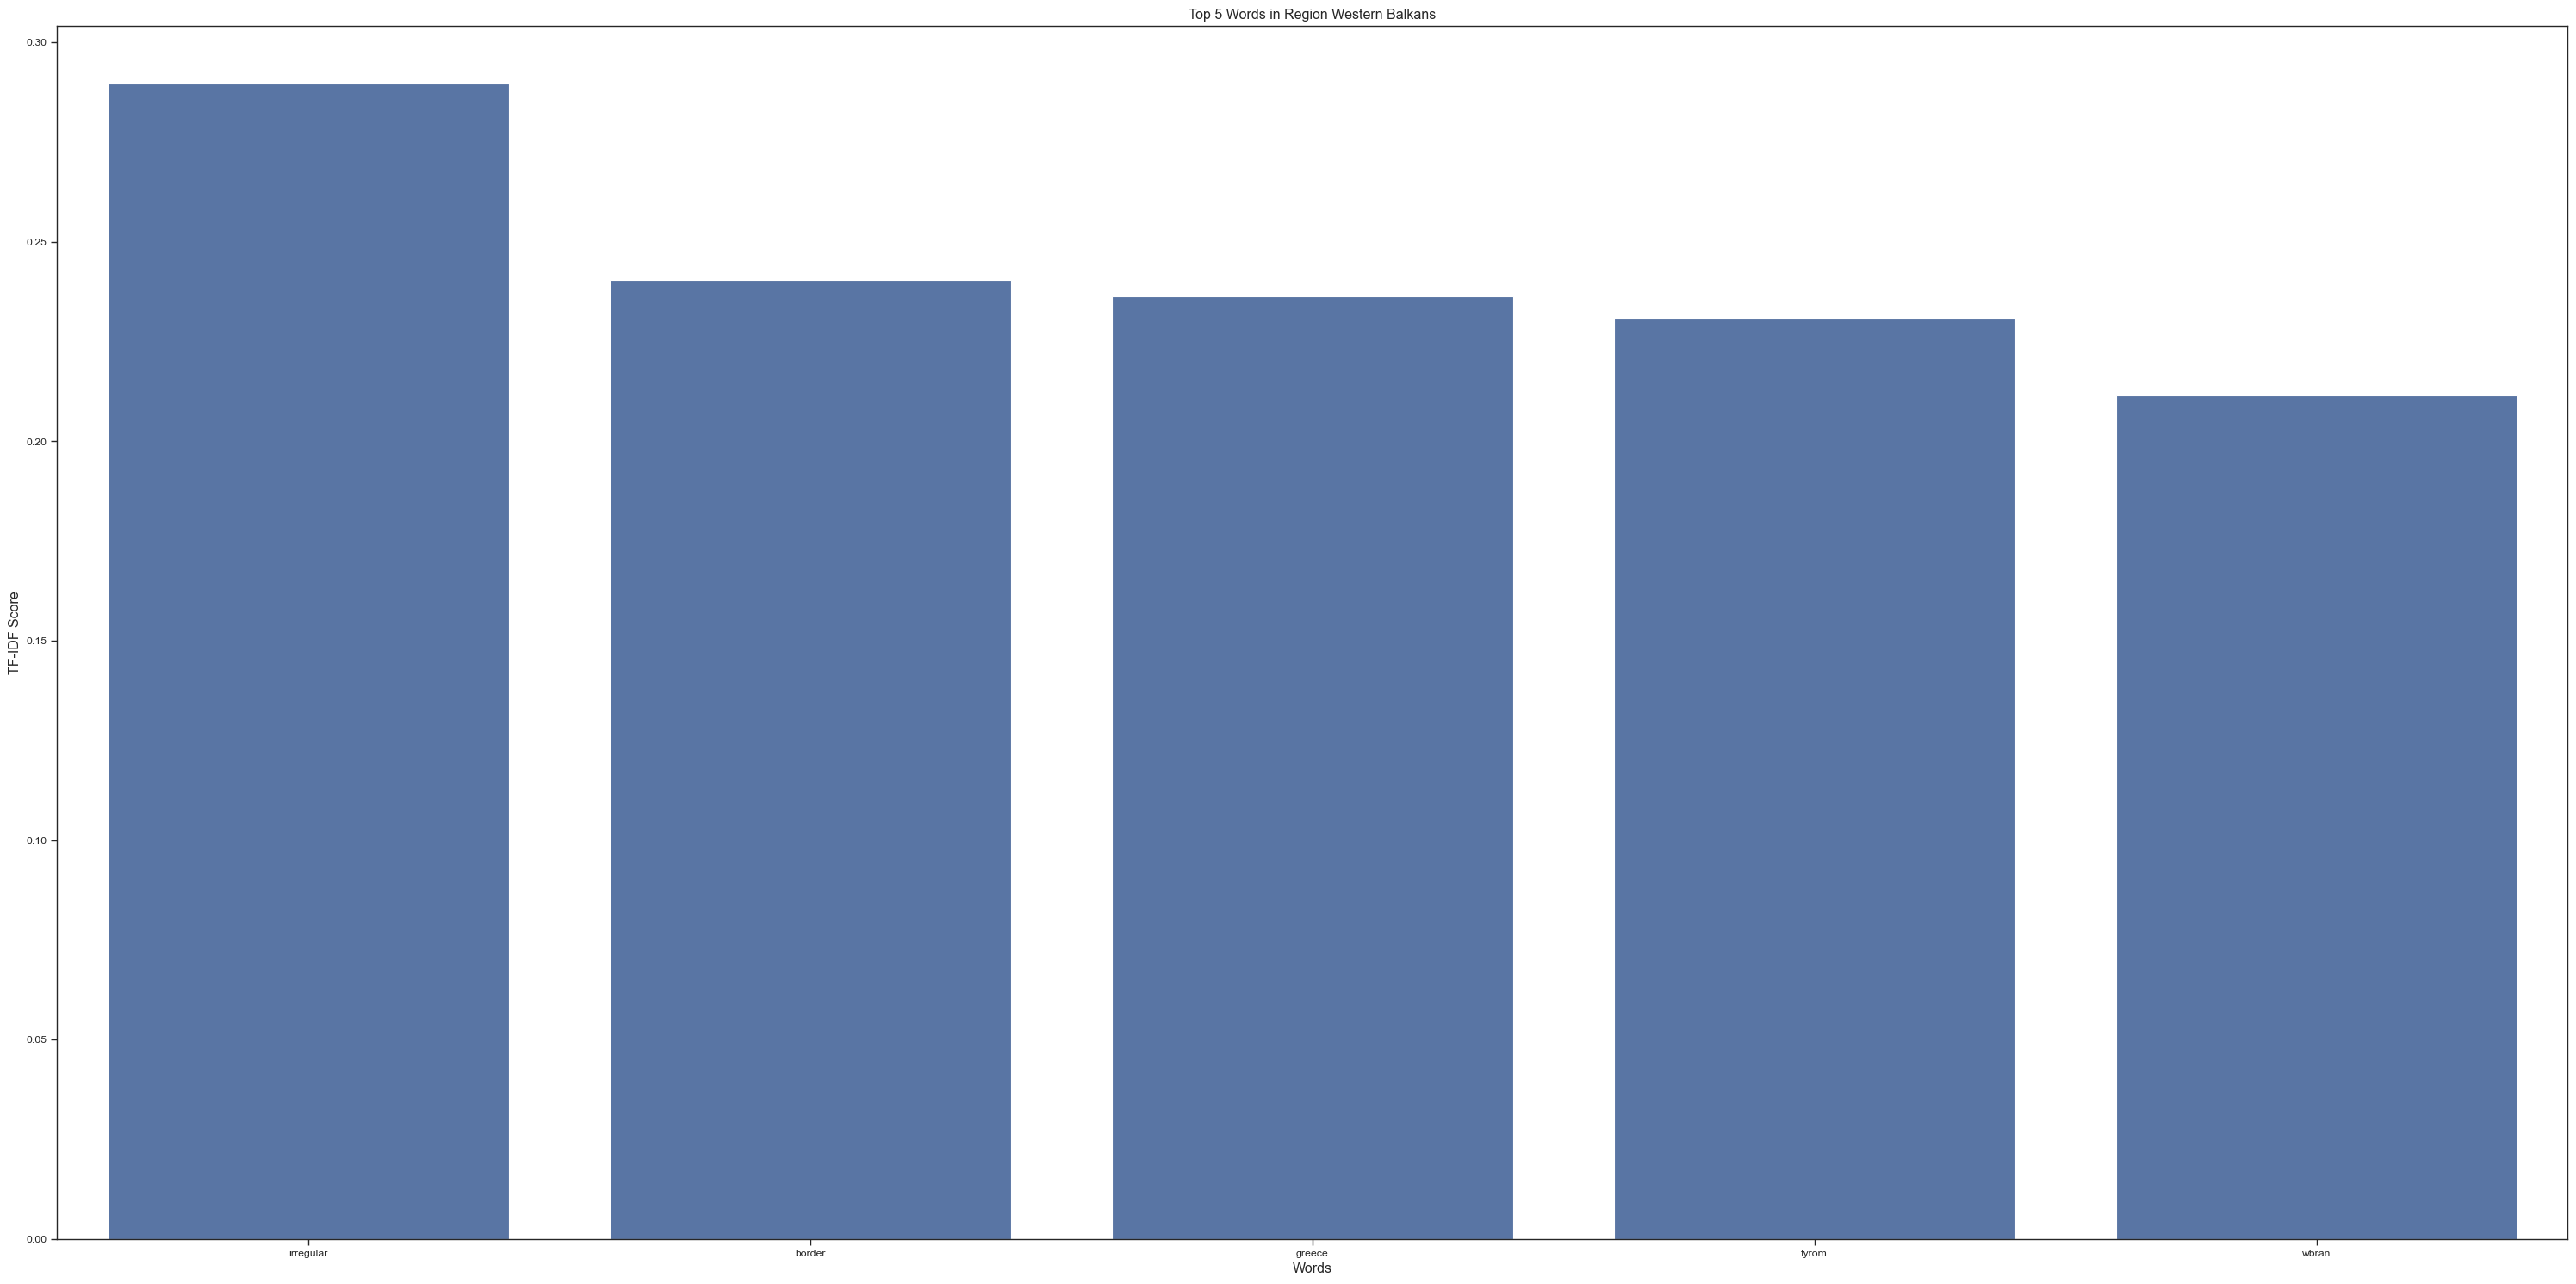

In [4]:
# Group by 'Region' and concatenate all TF-IDF tuples
grouped_region = df.groupby('Region')['Top 10 TF-IDF Words'].sum()

# Convert grouped_region.items() to a list of tuples
grouped_region_items = list(grouped_region.items())

for i, (region, tfidf_tuples_str) in enumerate(grouped_region_items):
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Words': words, 'TF-IDF Score': scores})
        
        # Create a new figure for each region
        plt.figure(i)
        
        # Plot using seaborn
        sns.barplot(x='Words', y='TF-IDF Score', data=data)
        plt.title(f'Top 5 Words in Region {region}')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

#### One Combined Barplot with Region as Legend

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_5276/3959537515.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, data], ignore_index=True)


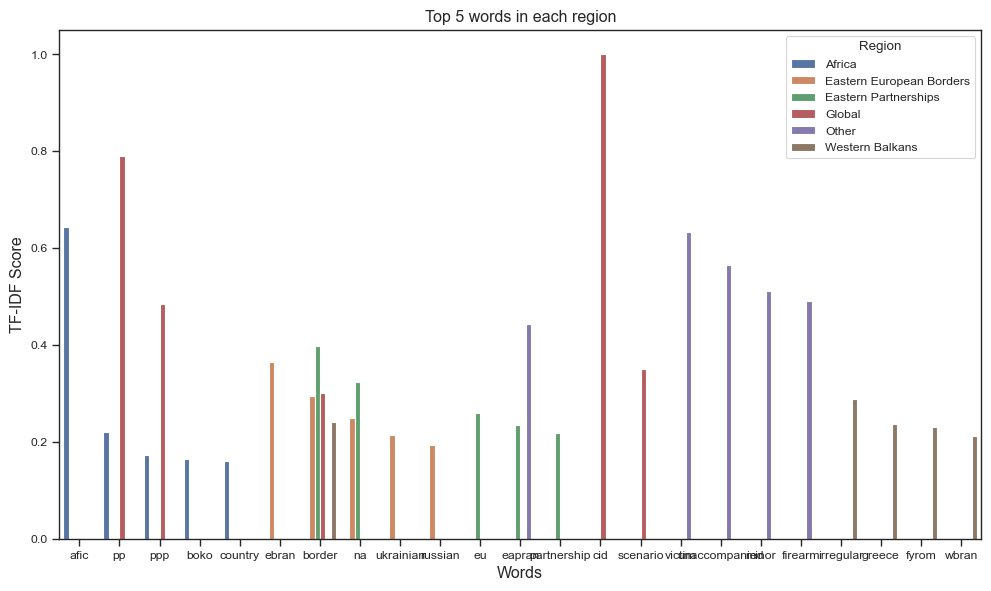

In [5]:
# Prepare an empty DataFrame for all data
all_data = pd.DataFrame(columns=['Region', 'Words', 'TF-IDF Score'])

for region, tfidf_tuples_str in grouped_region_items:
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Region': [region]*len(words), 'Words': words, 'TF-IDF Score': scores})
        
        # Append data to all_data
        all_data = pd.concat([all_data, data], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Words', y='TF-IDF Score', hue='Region', data=all_data)
plt.title('Top 5 words in each region')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.tight_layout()
plt.show()

#### Heatmap - Regions

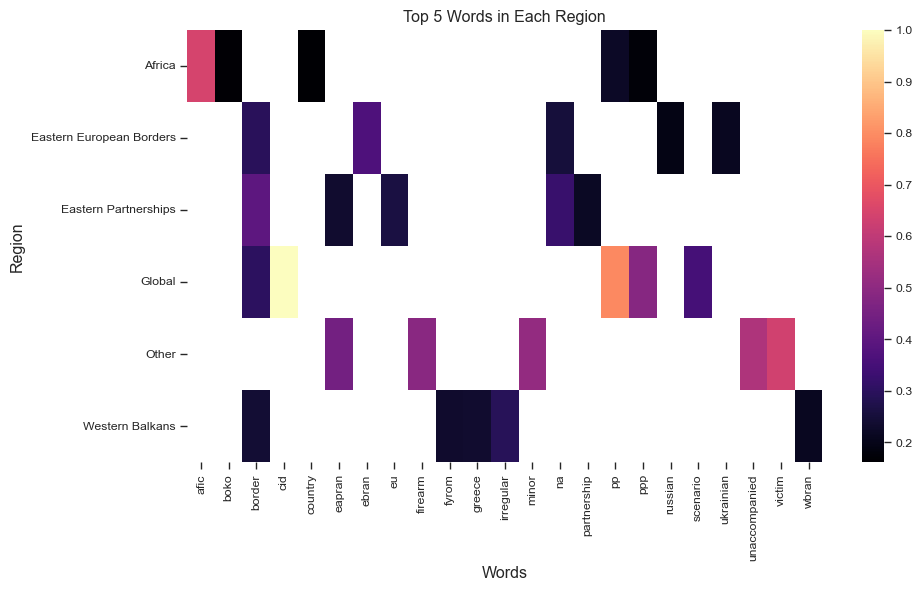

In [6]:
# Pivot the data for the heatmap
heatmap_data = all_data.pivot(index='Region', columns='Words', values='TF-IDF Score')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='magma')
plt.title('Top 5 Words in Each Region')
plt.xlabel('Words')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

    Out of all three visualization methods, heatmap is the best (visually), but results are not very insightful.

### TF-IDF Scores per Year

#### One Barplot per Year

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_5276/1551130234.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data_year = pd.concat([all_data_year, data], ignore_index=True)


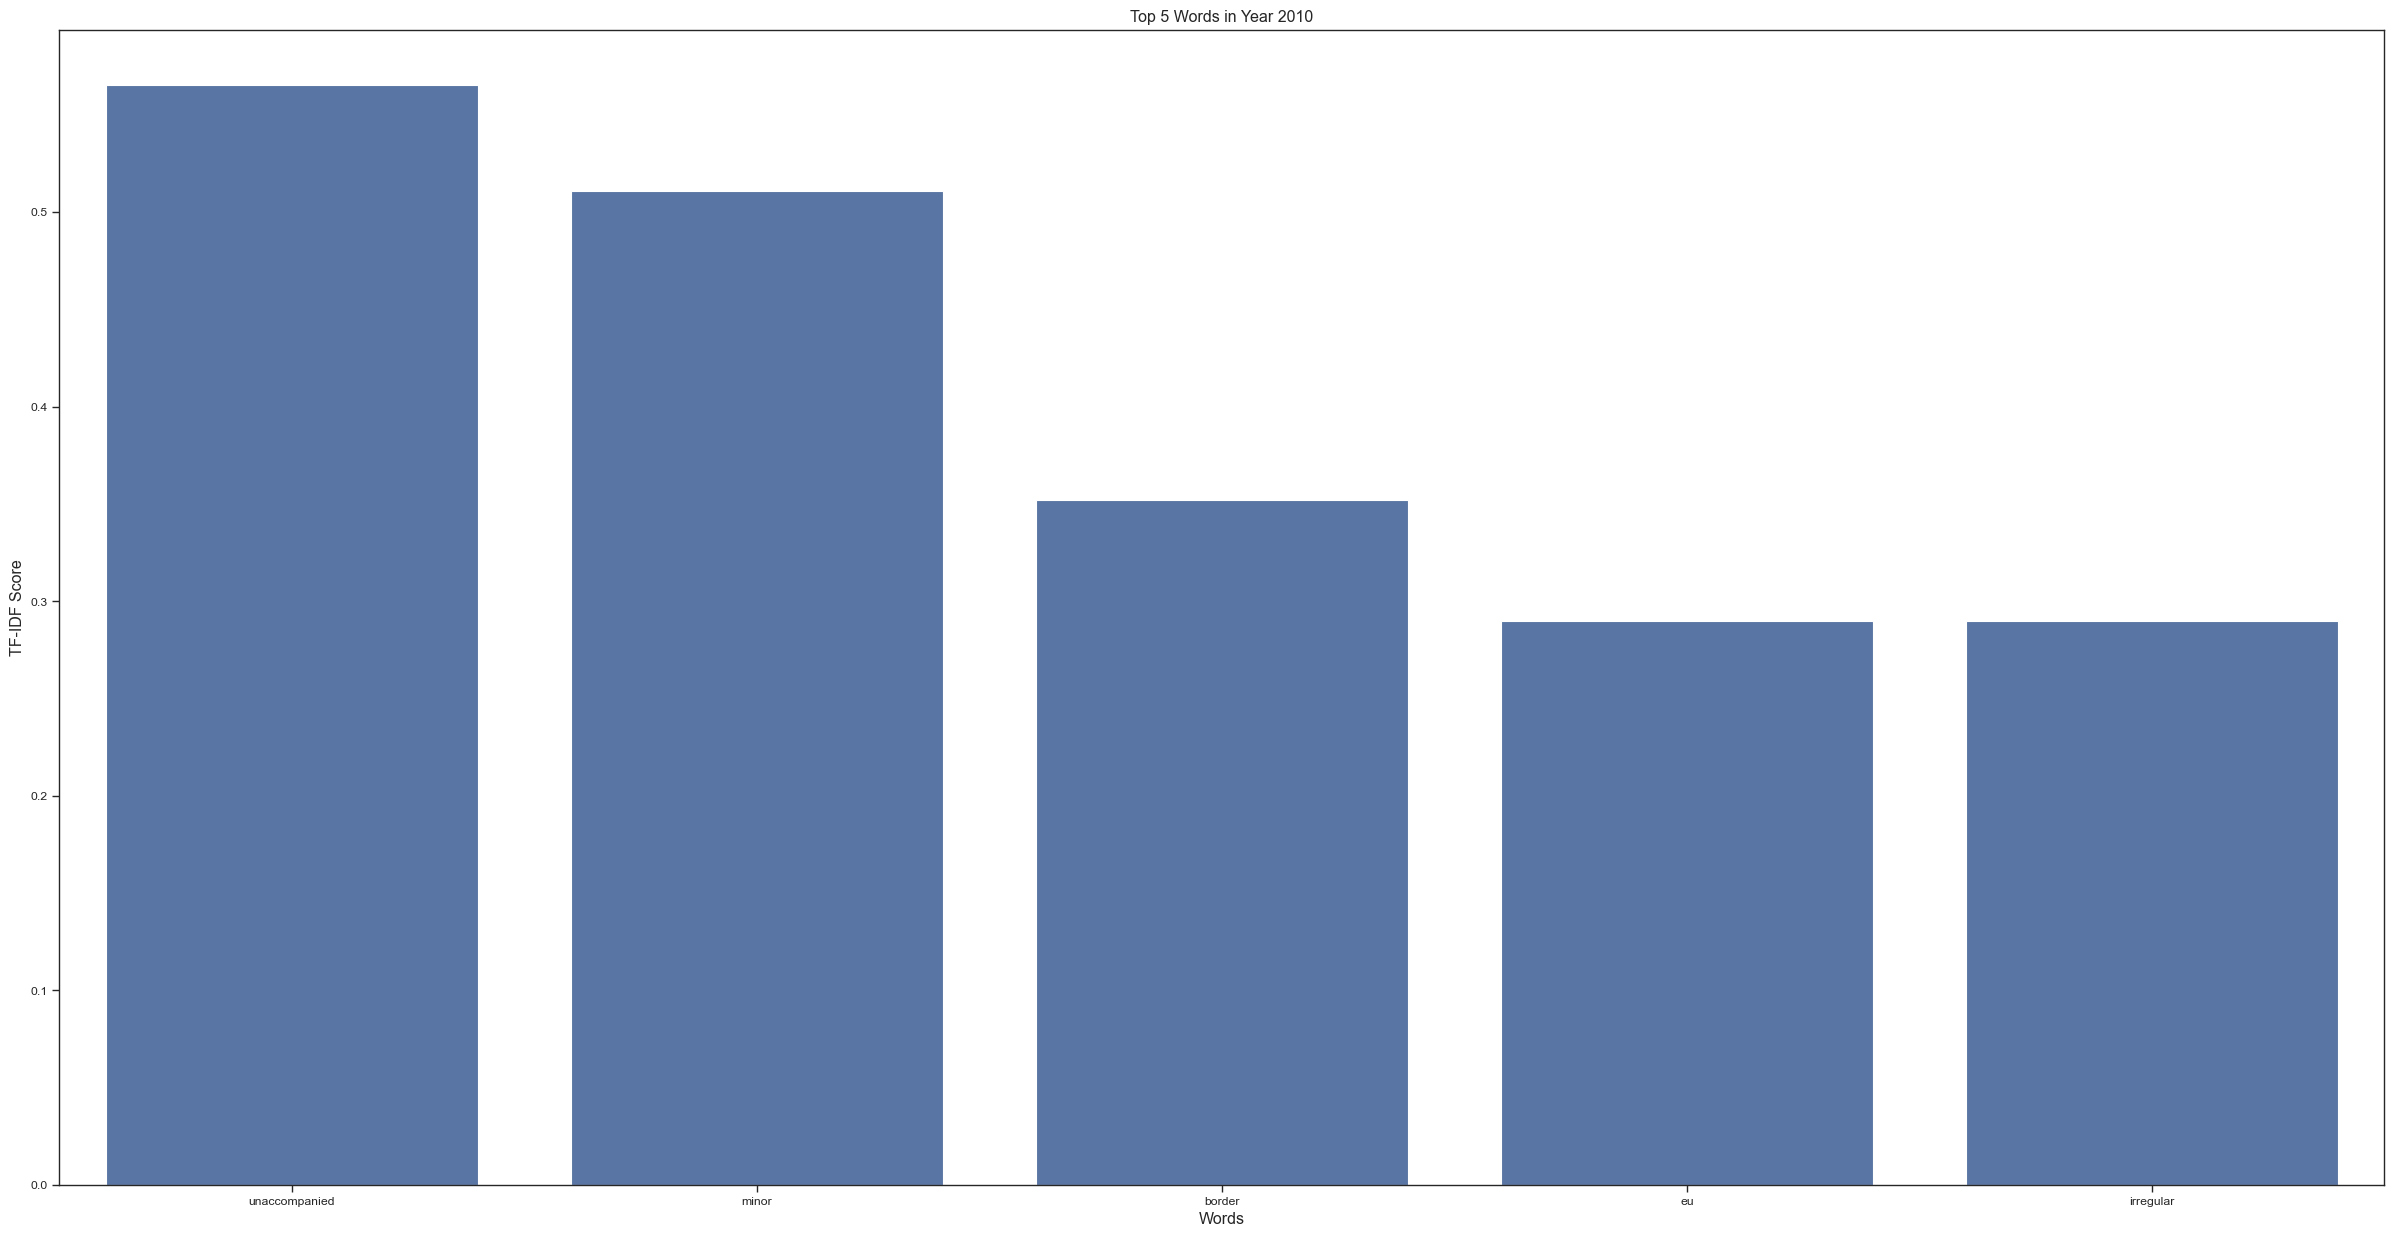

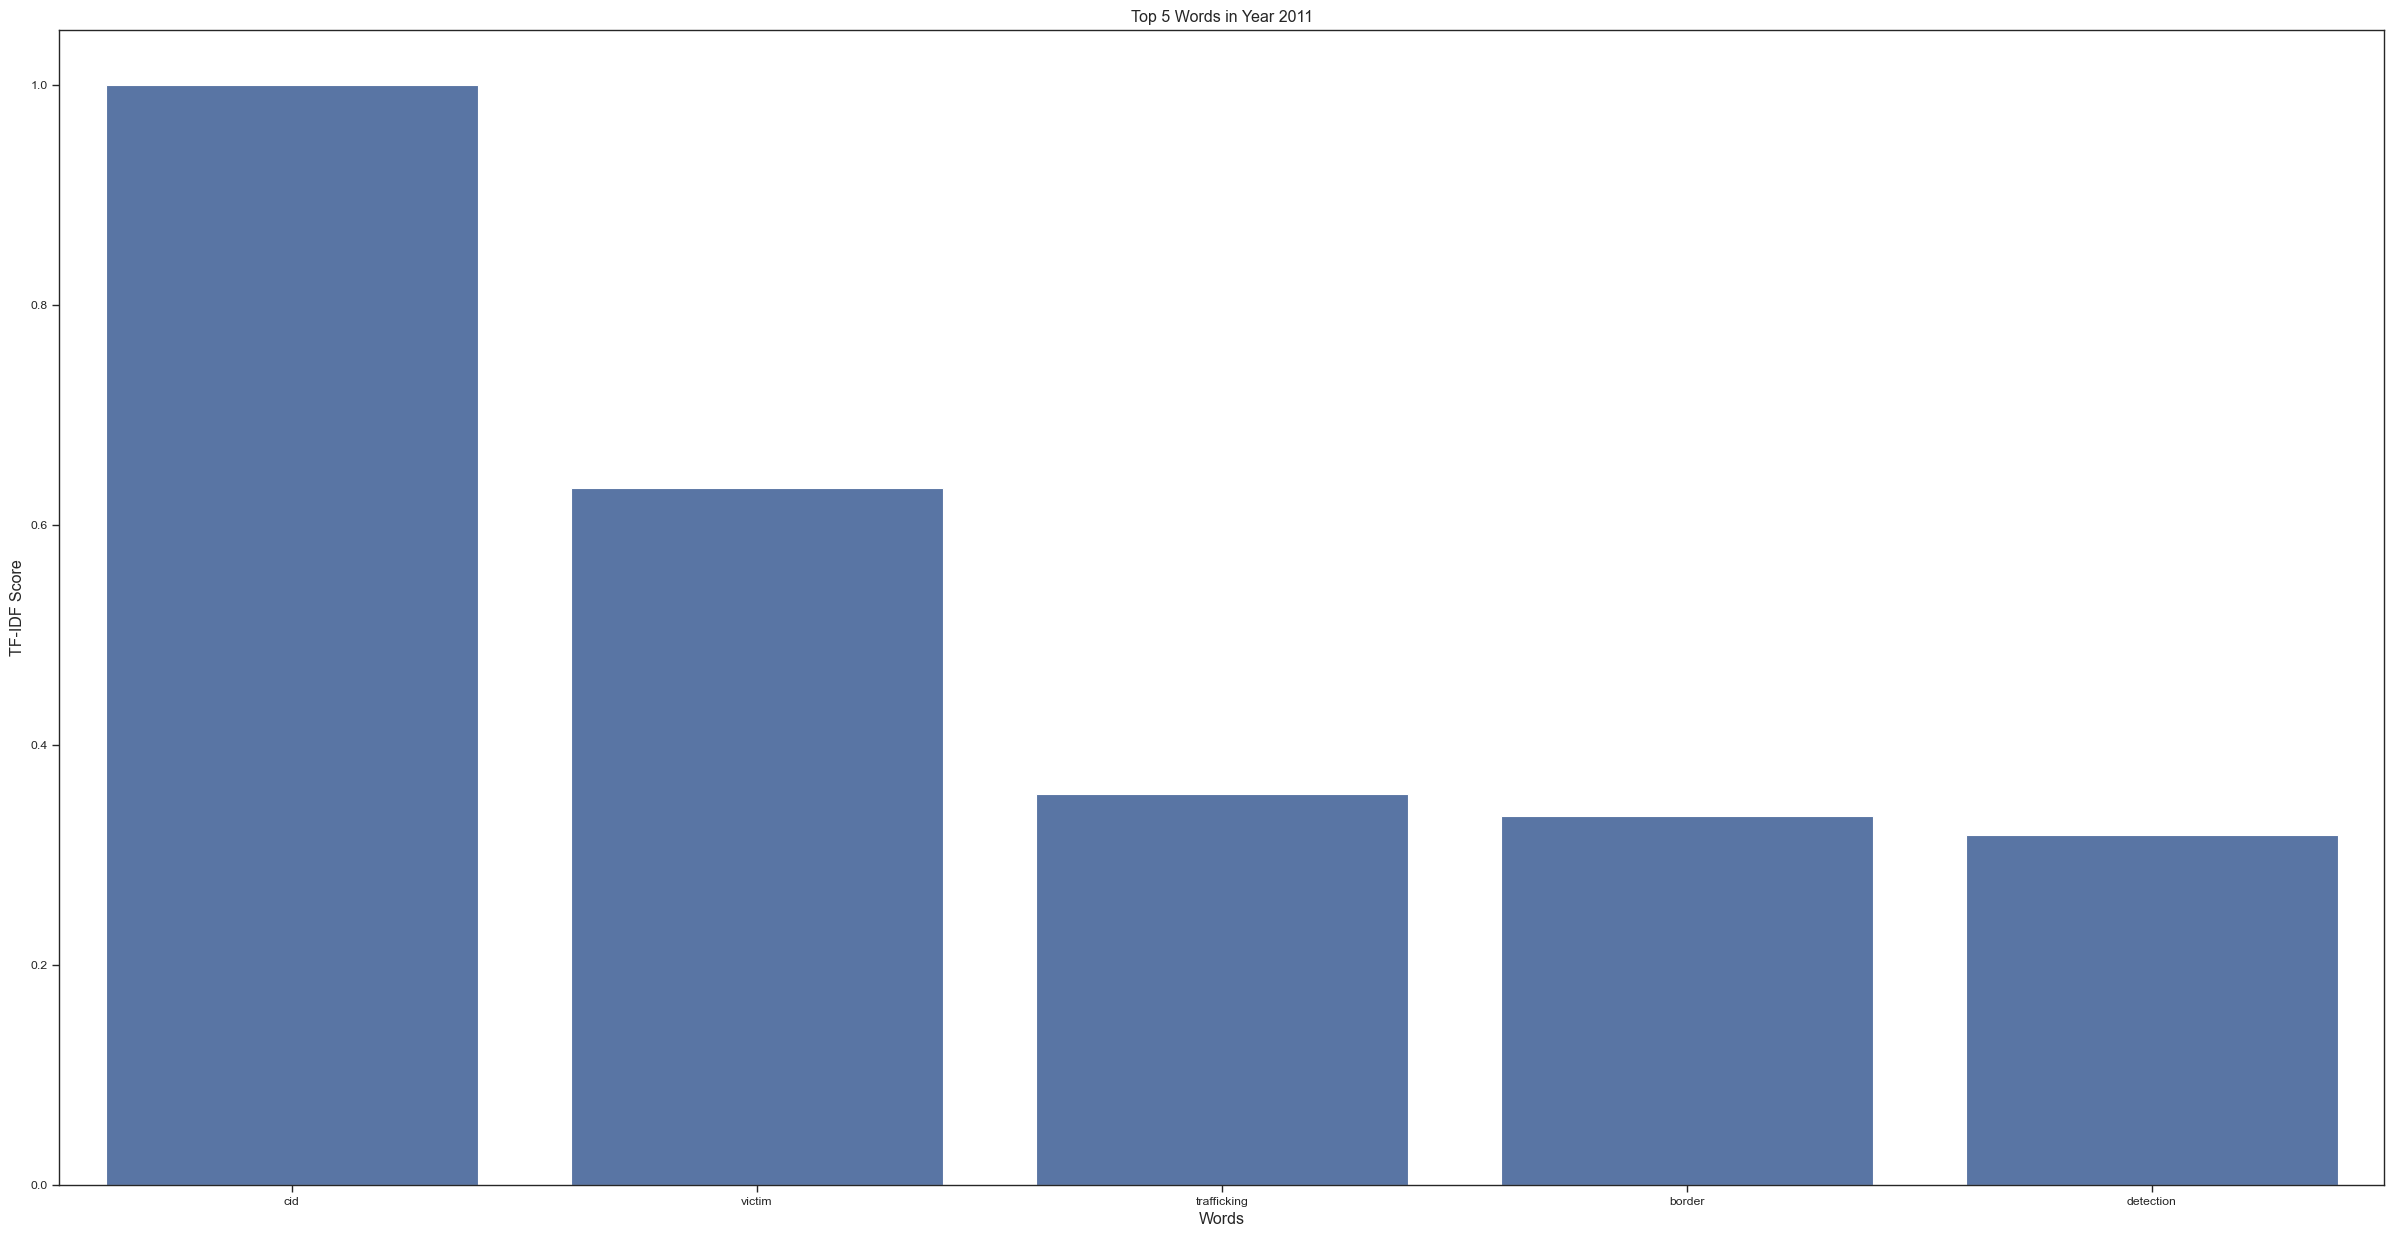

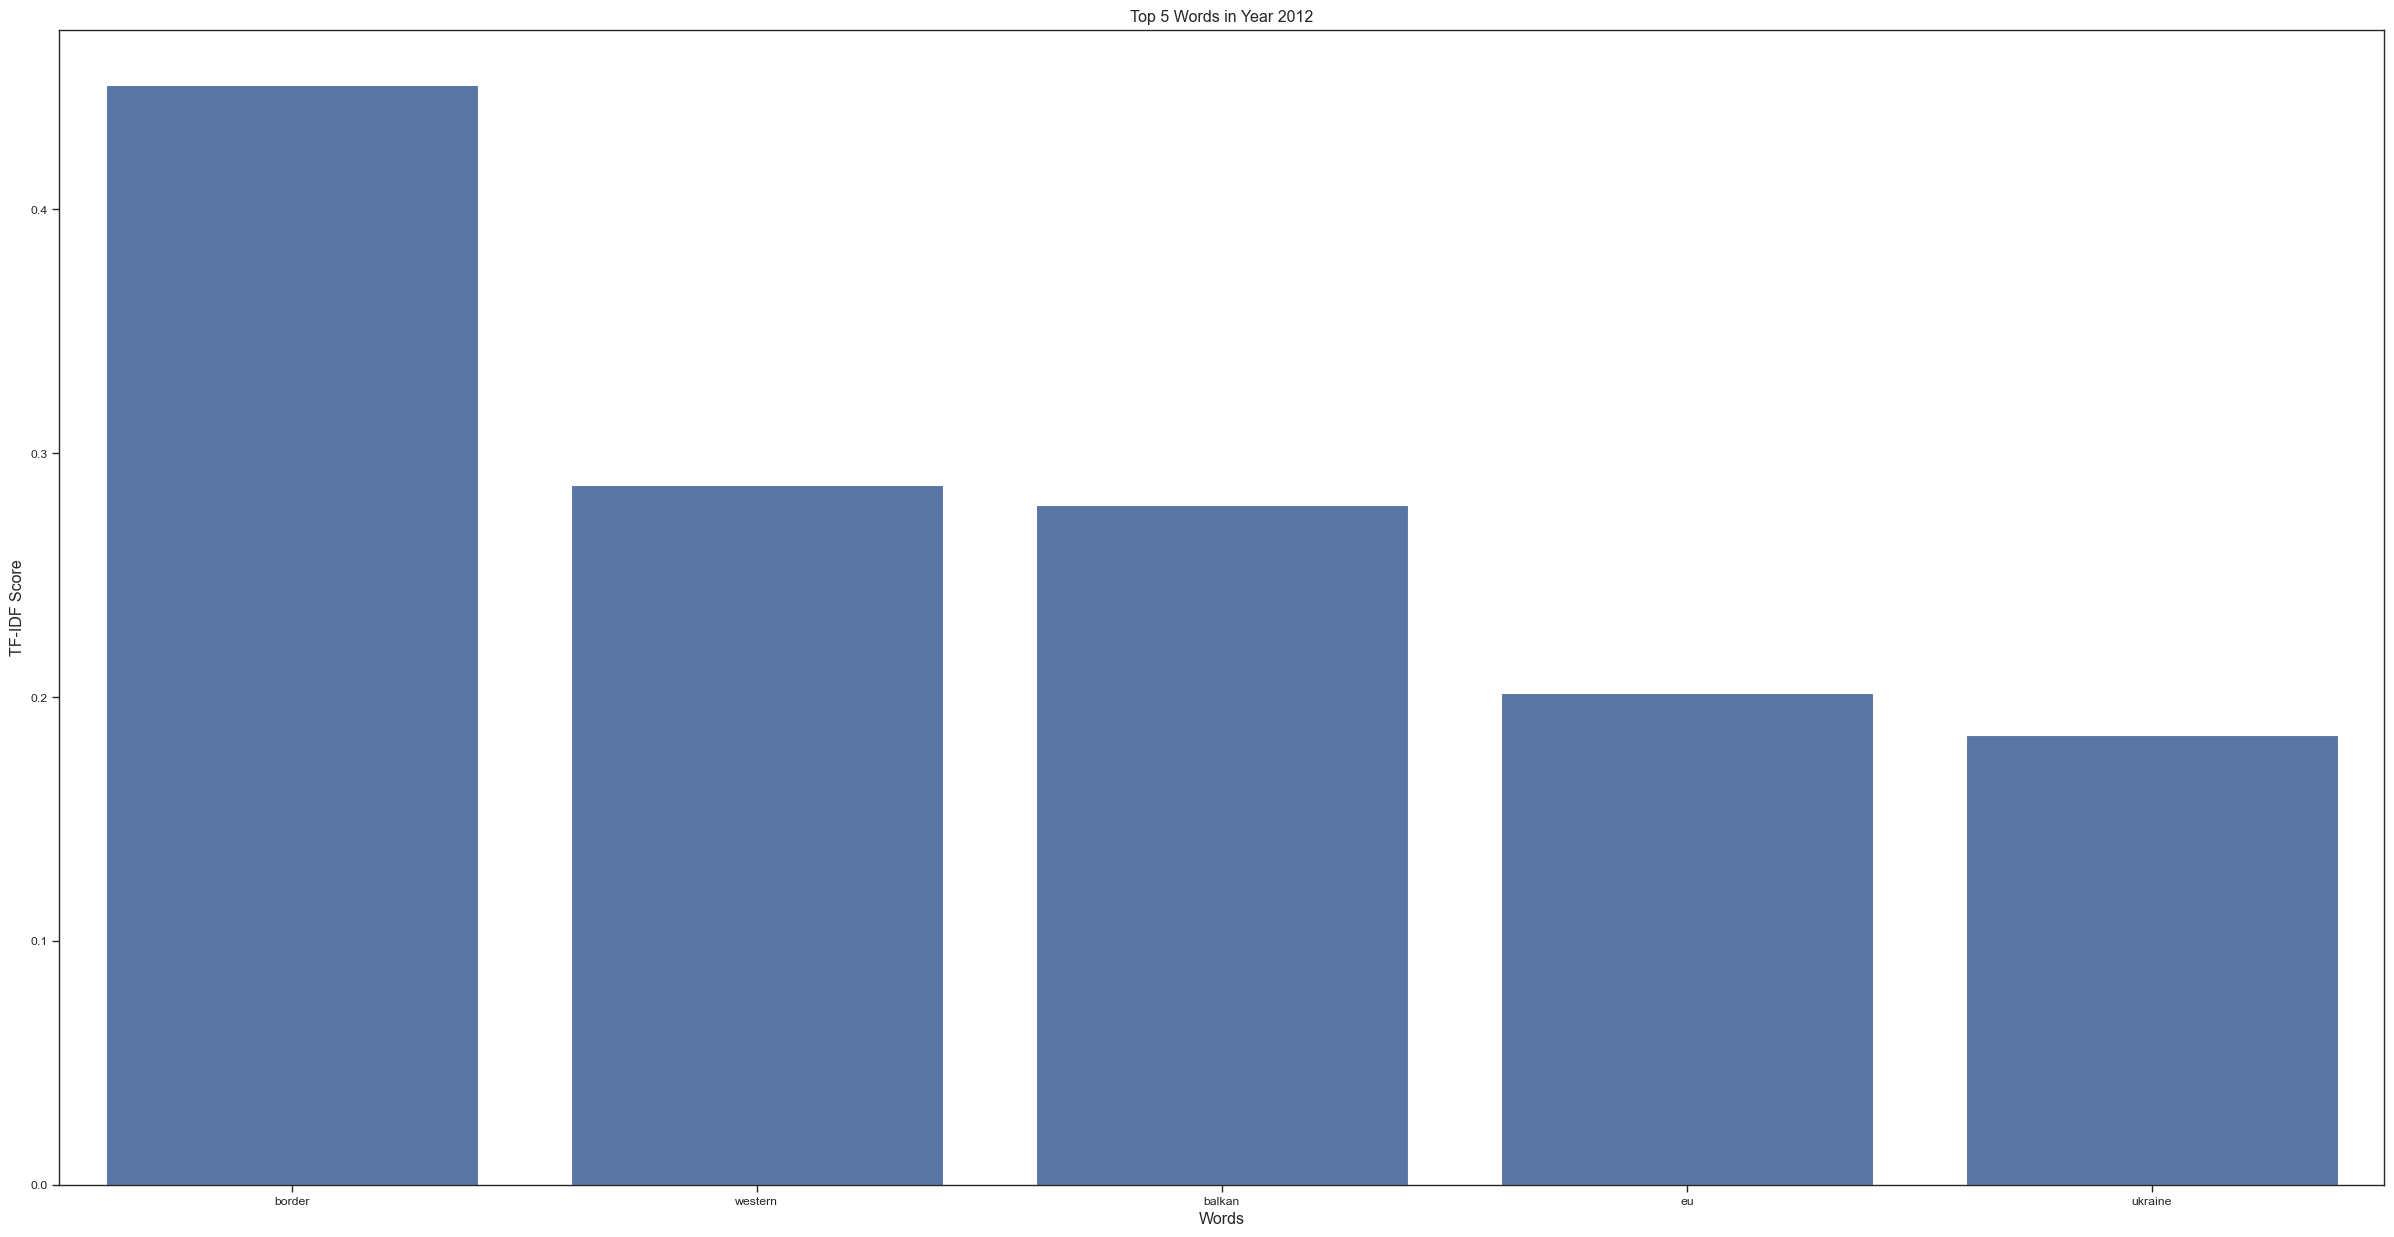

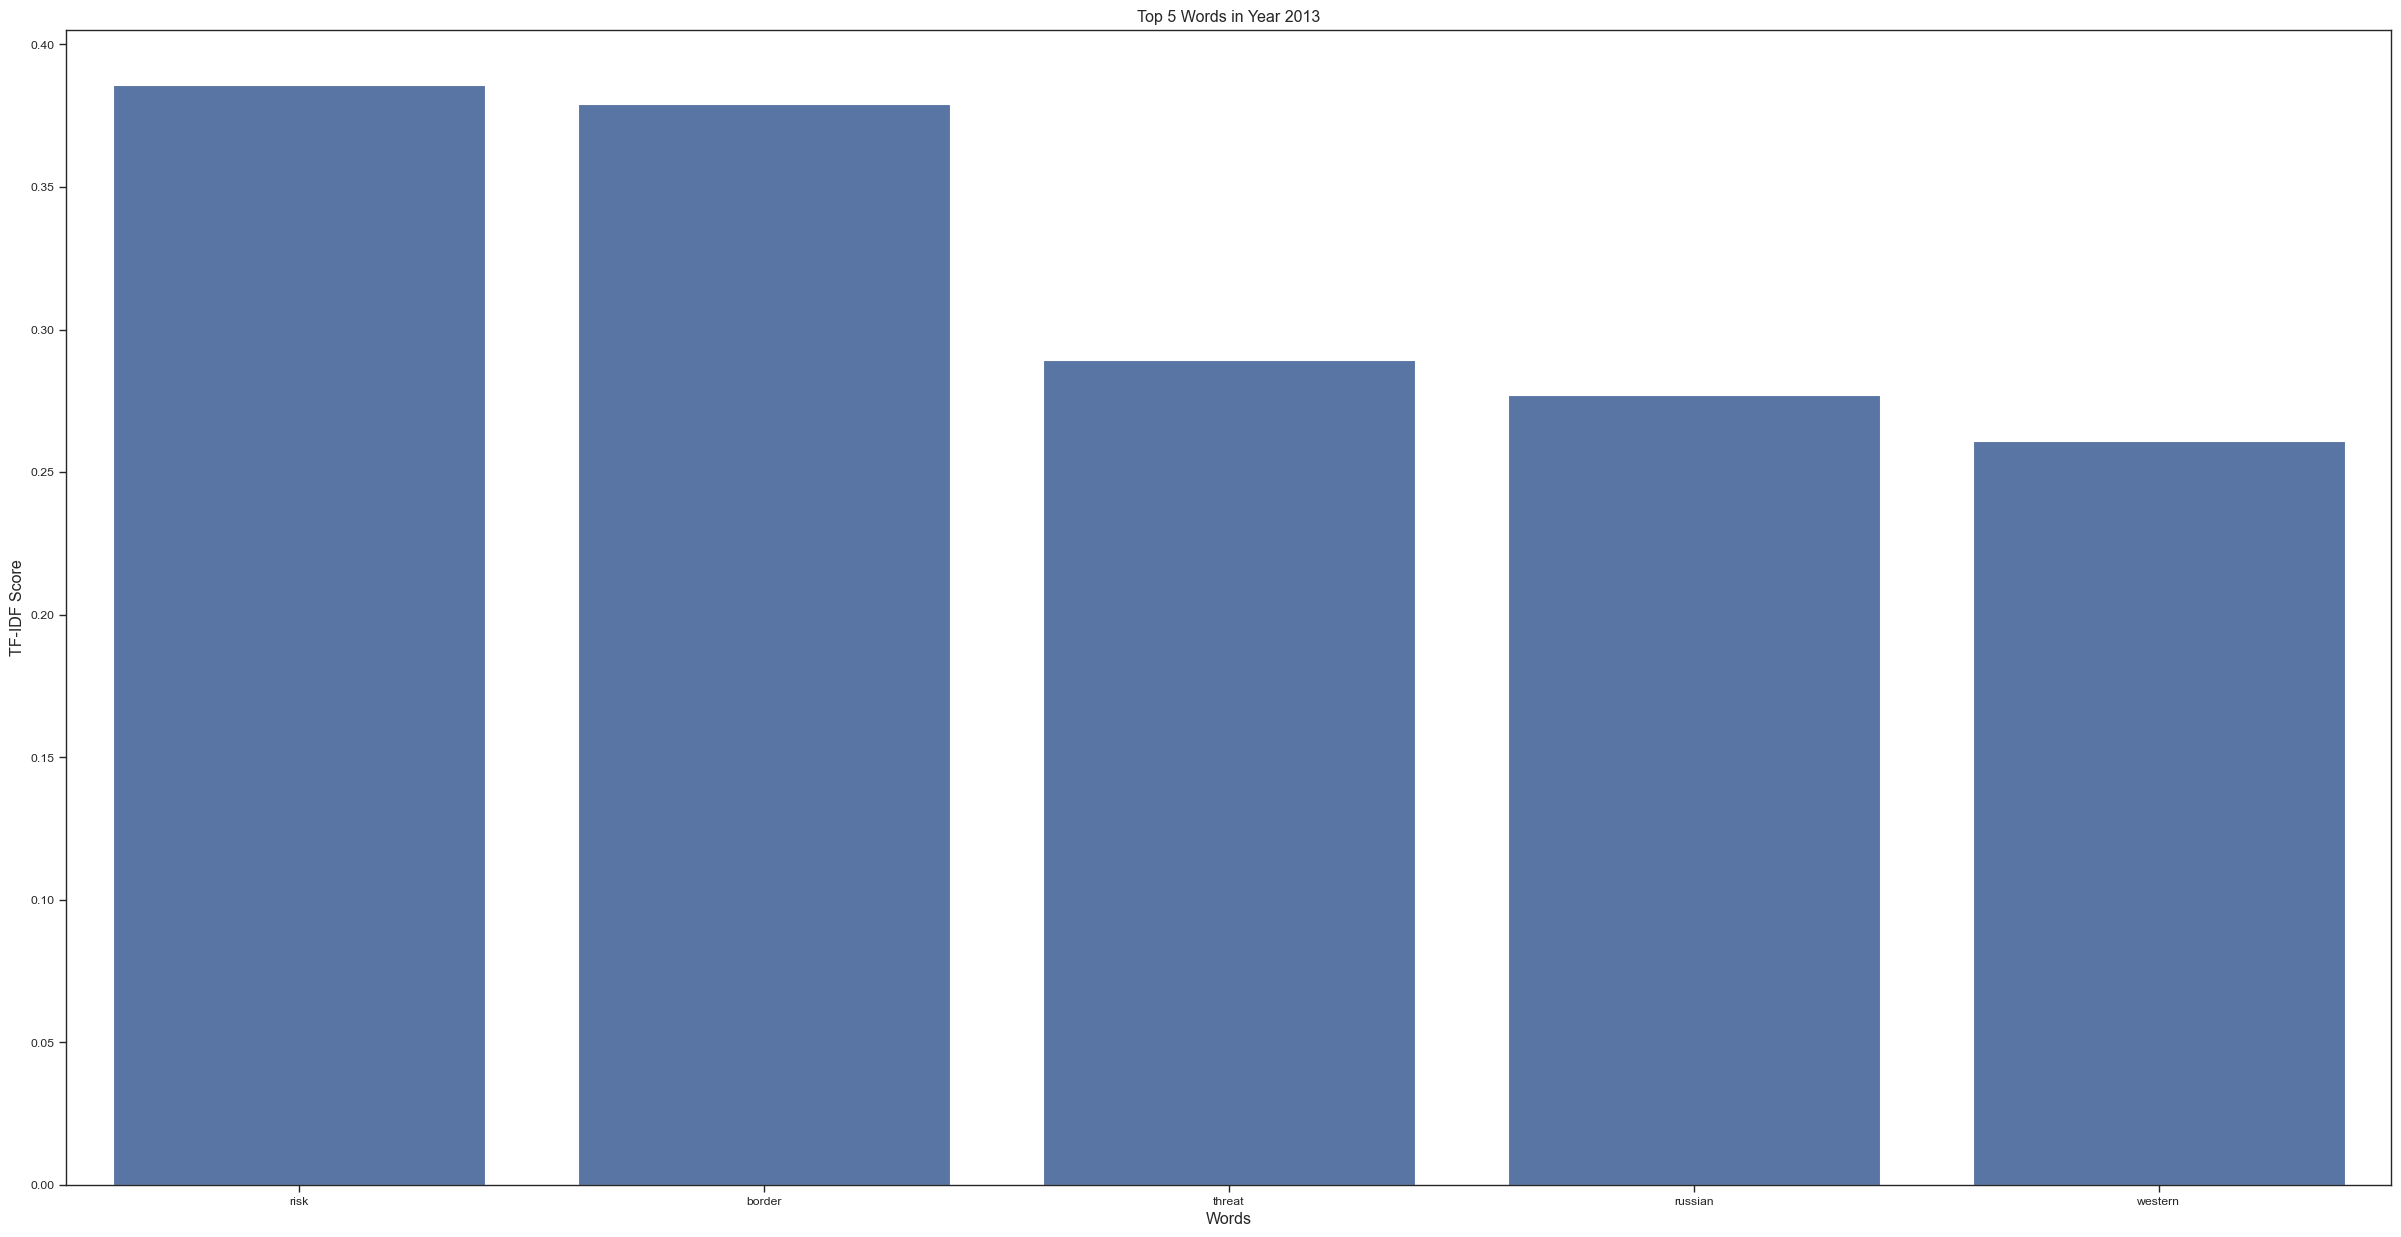

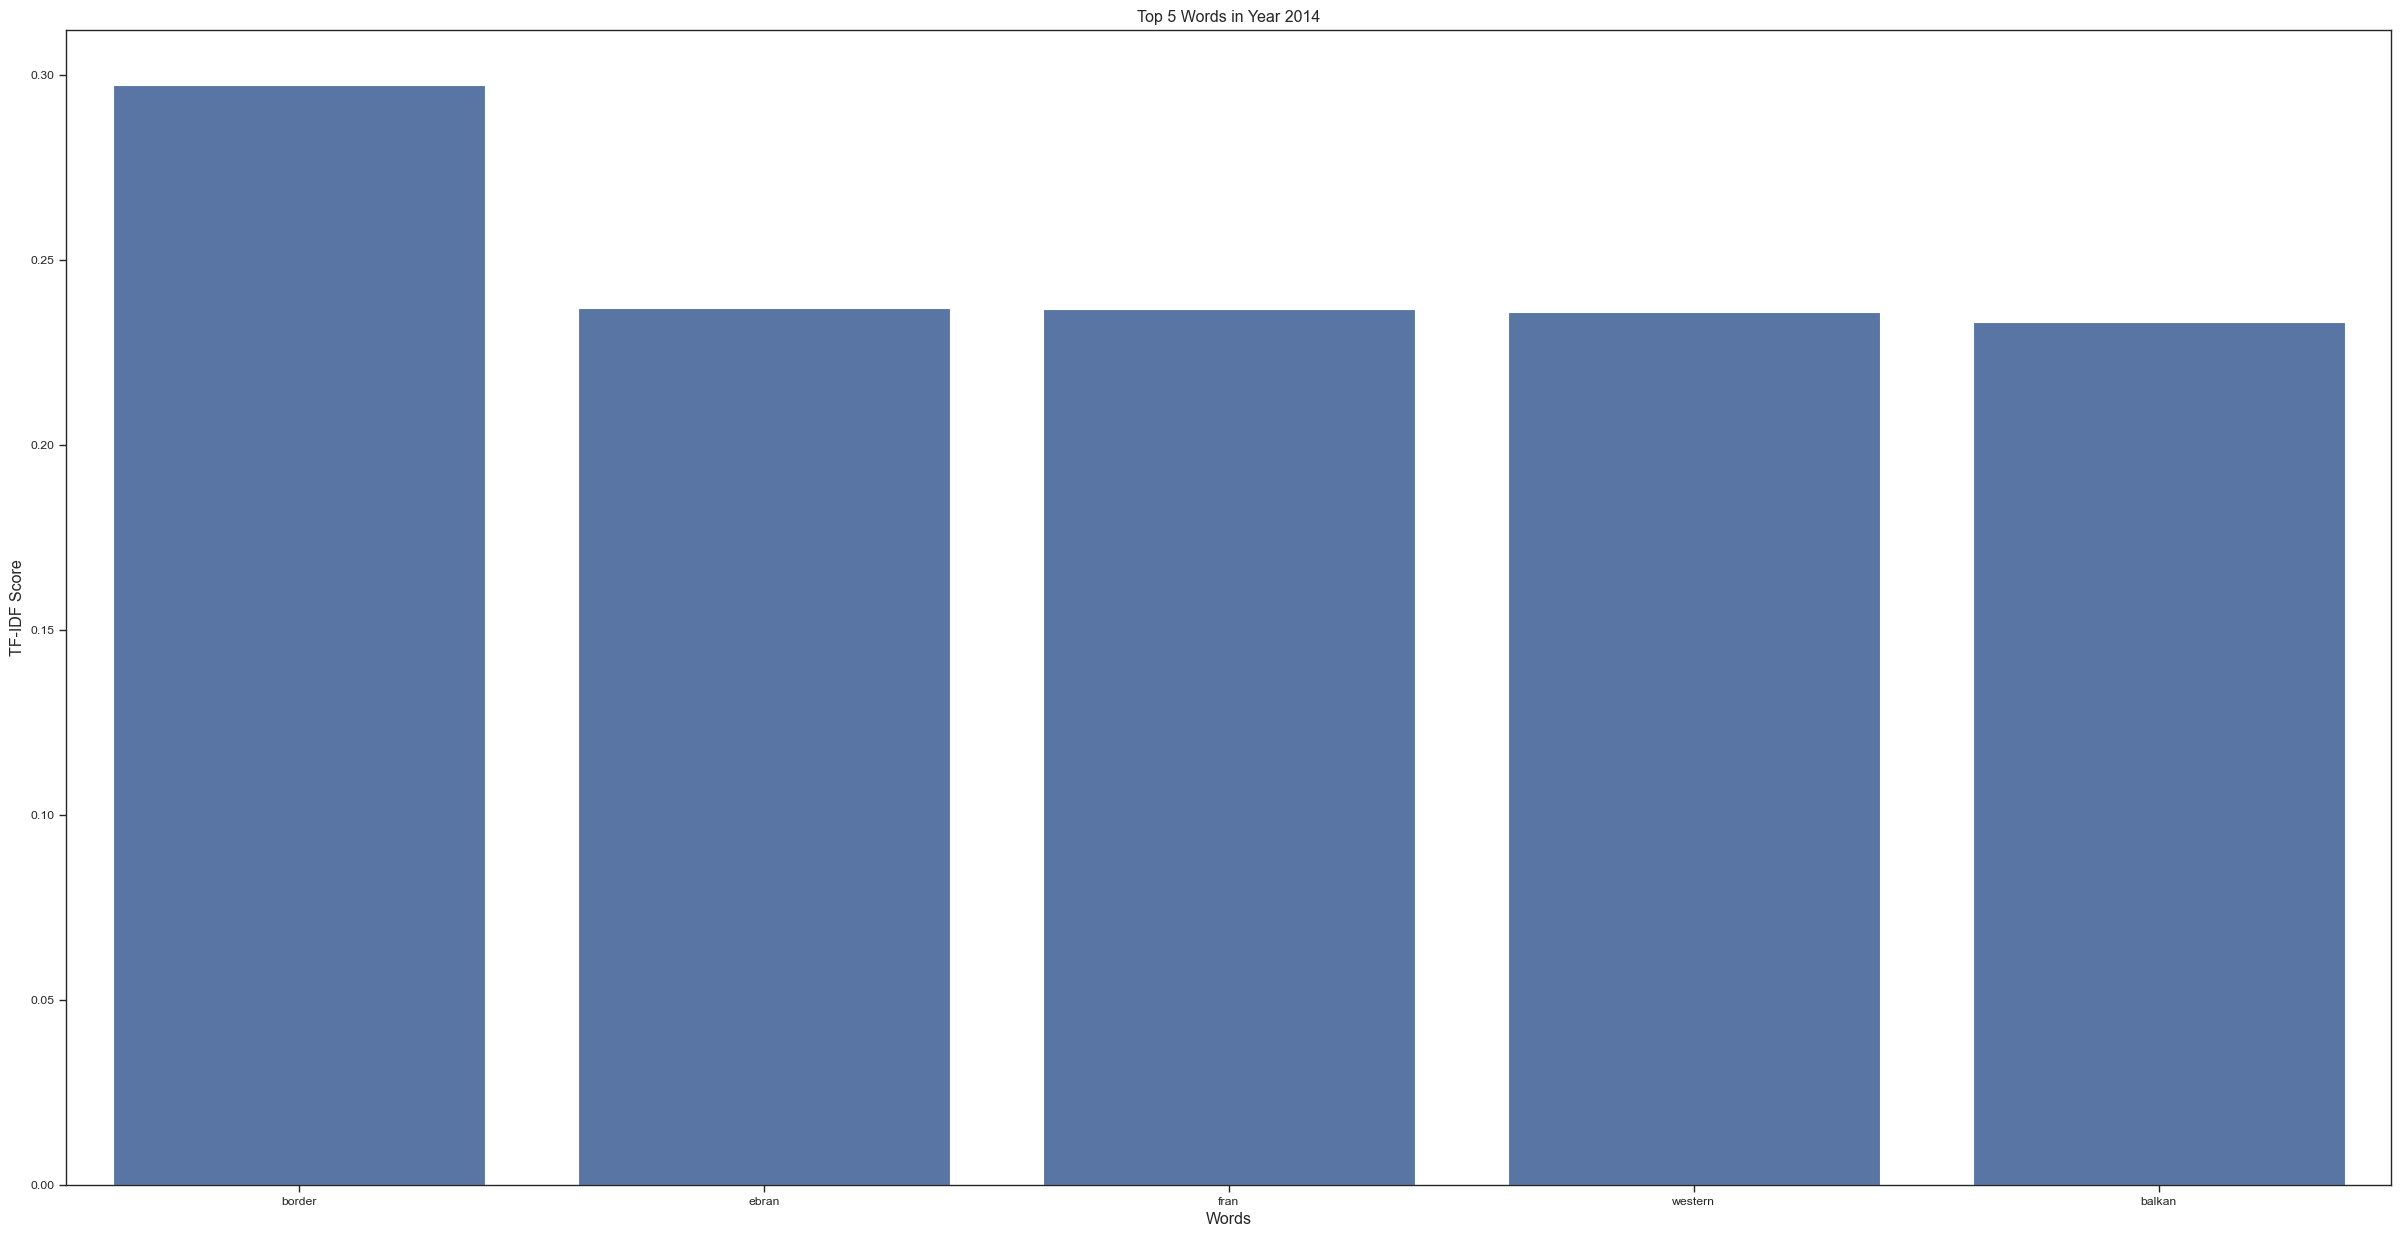

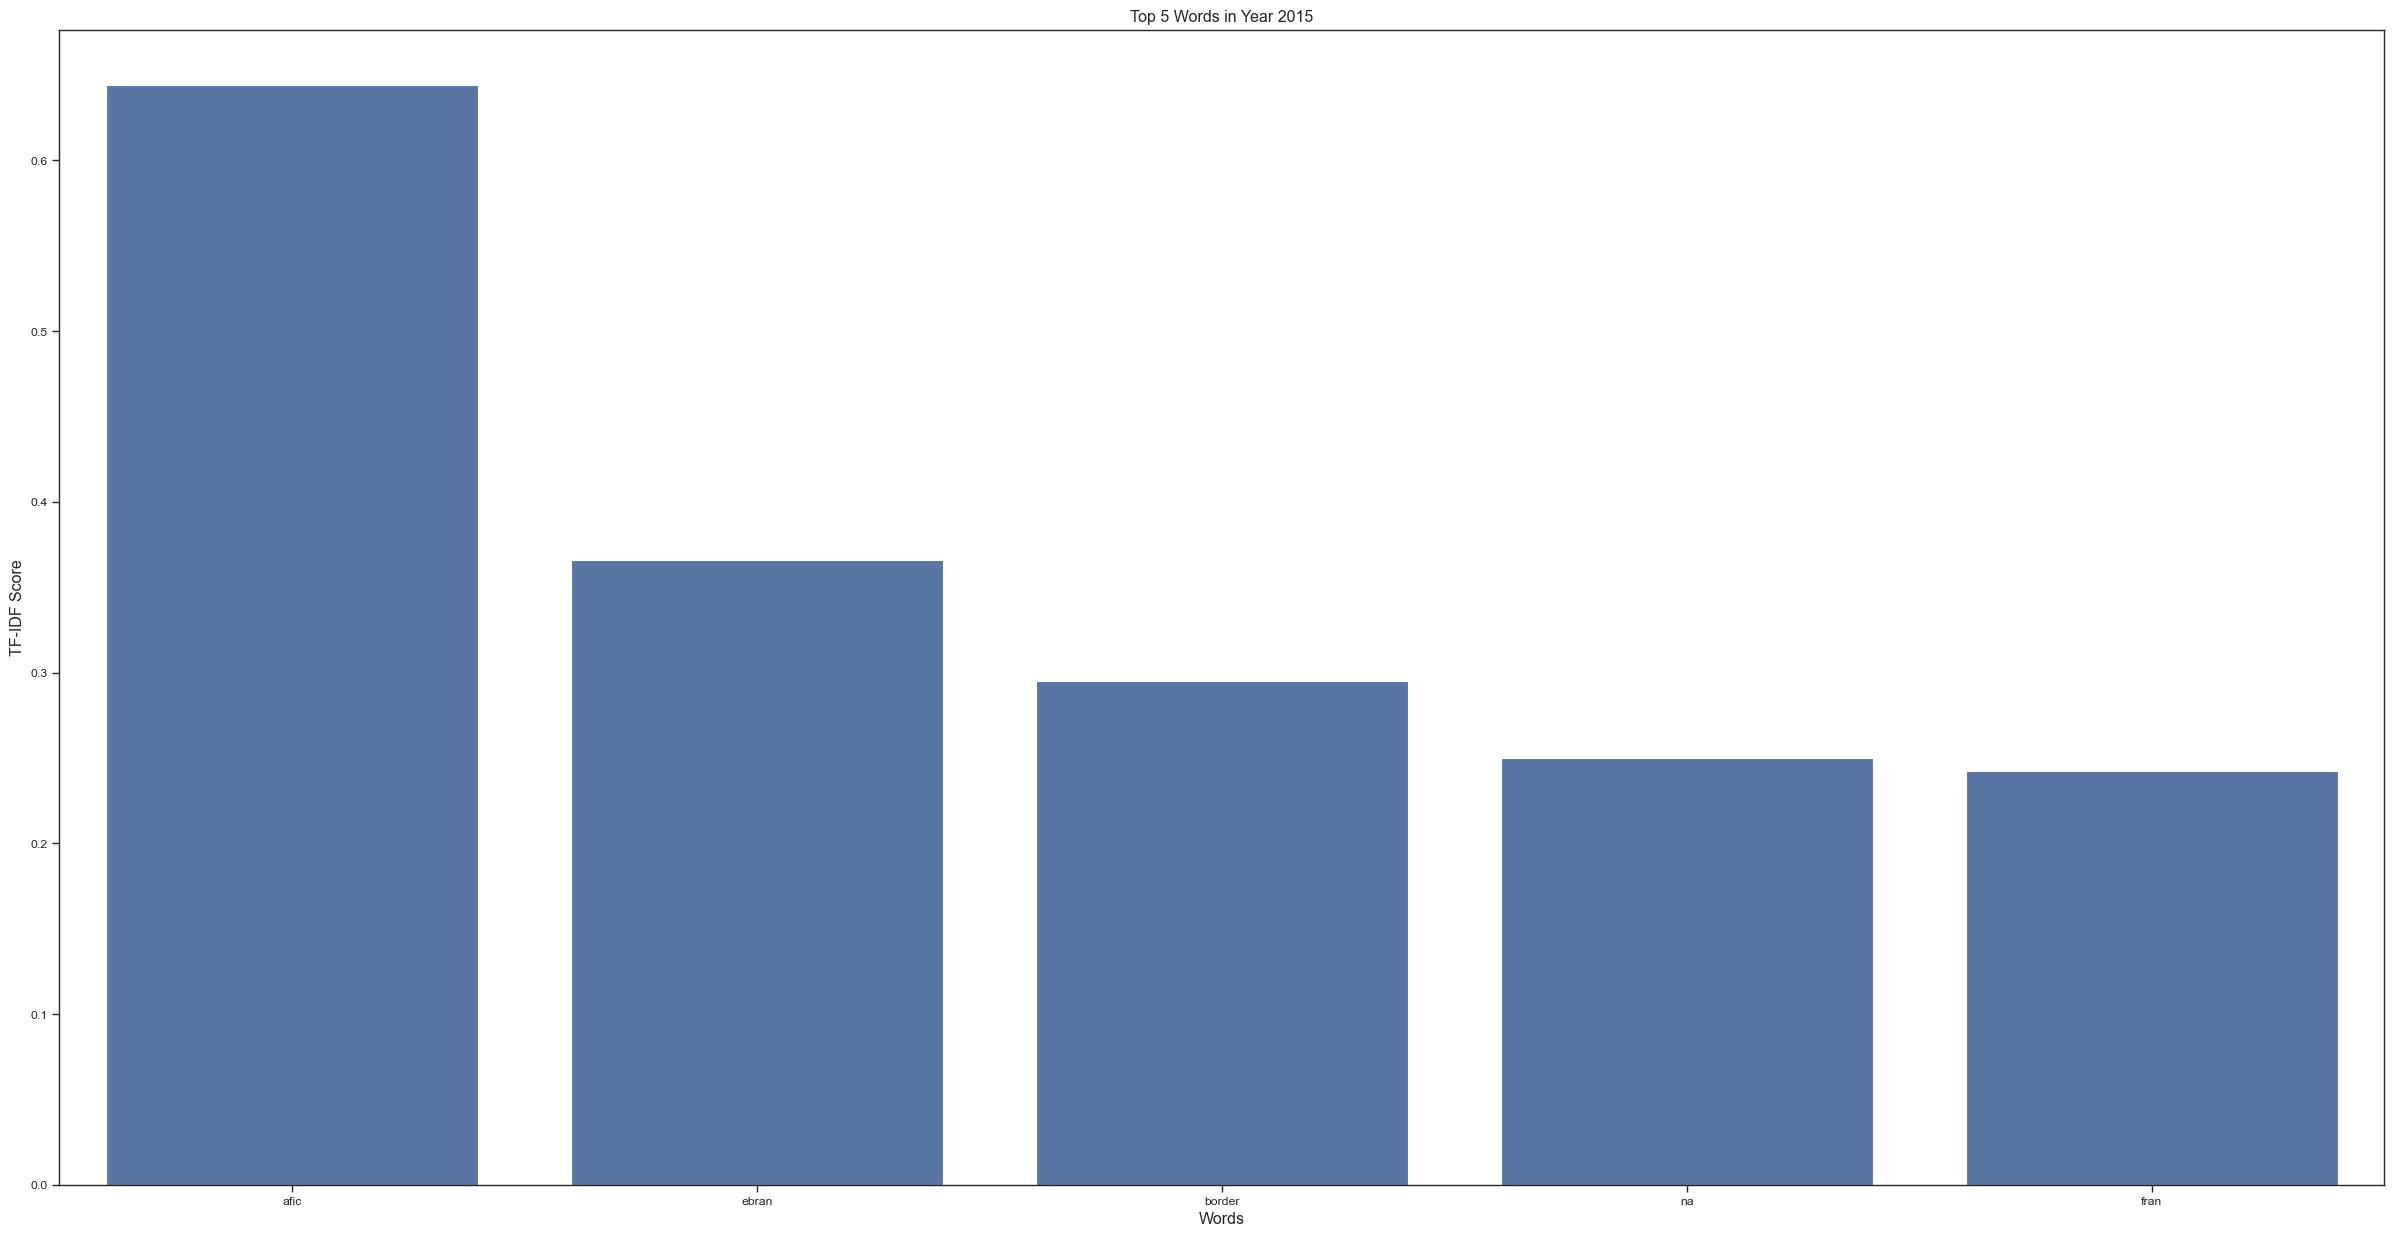

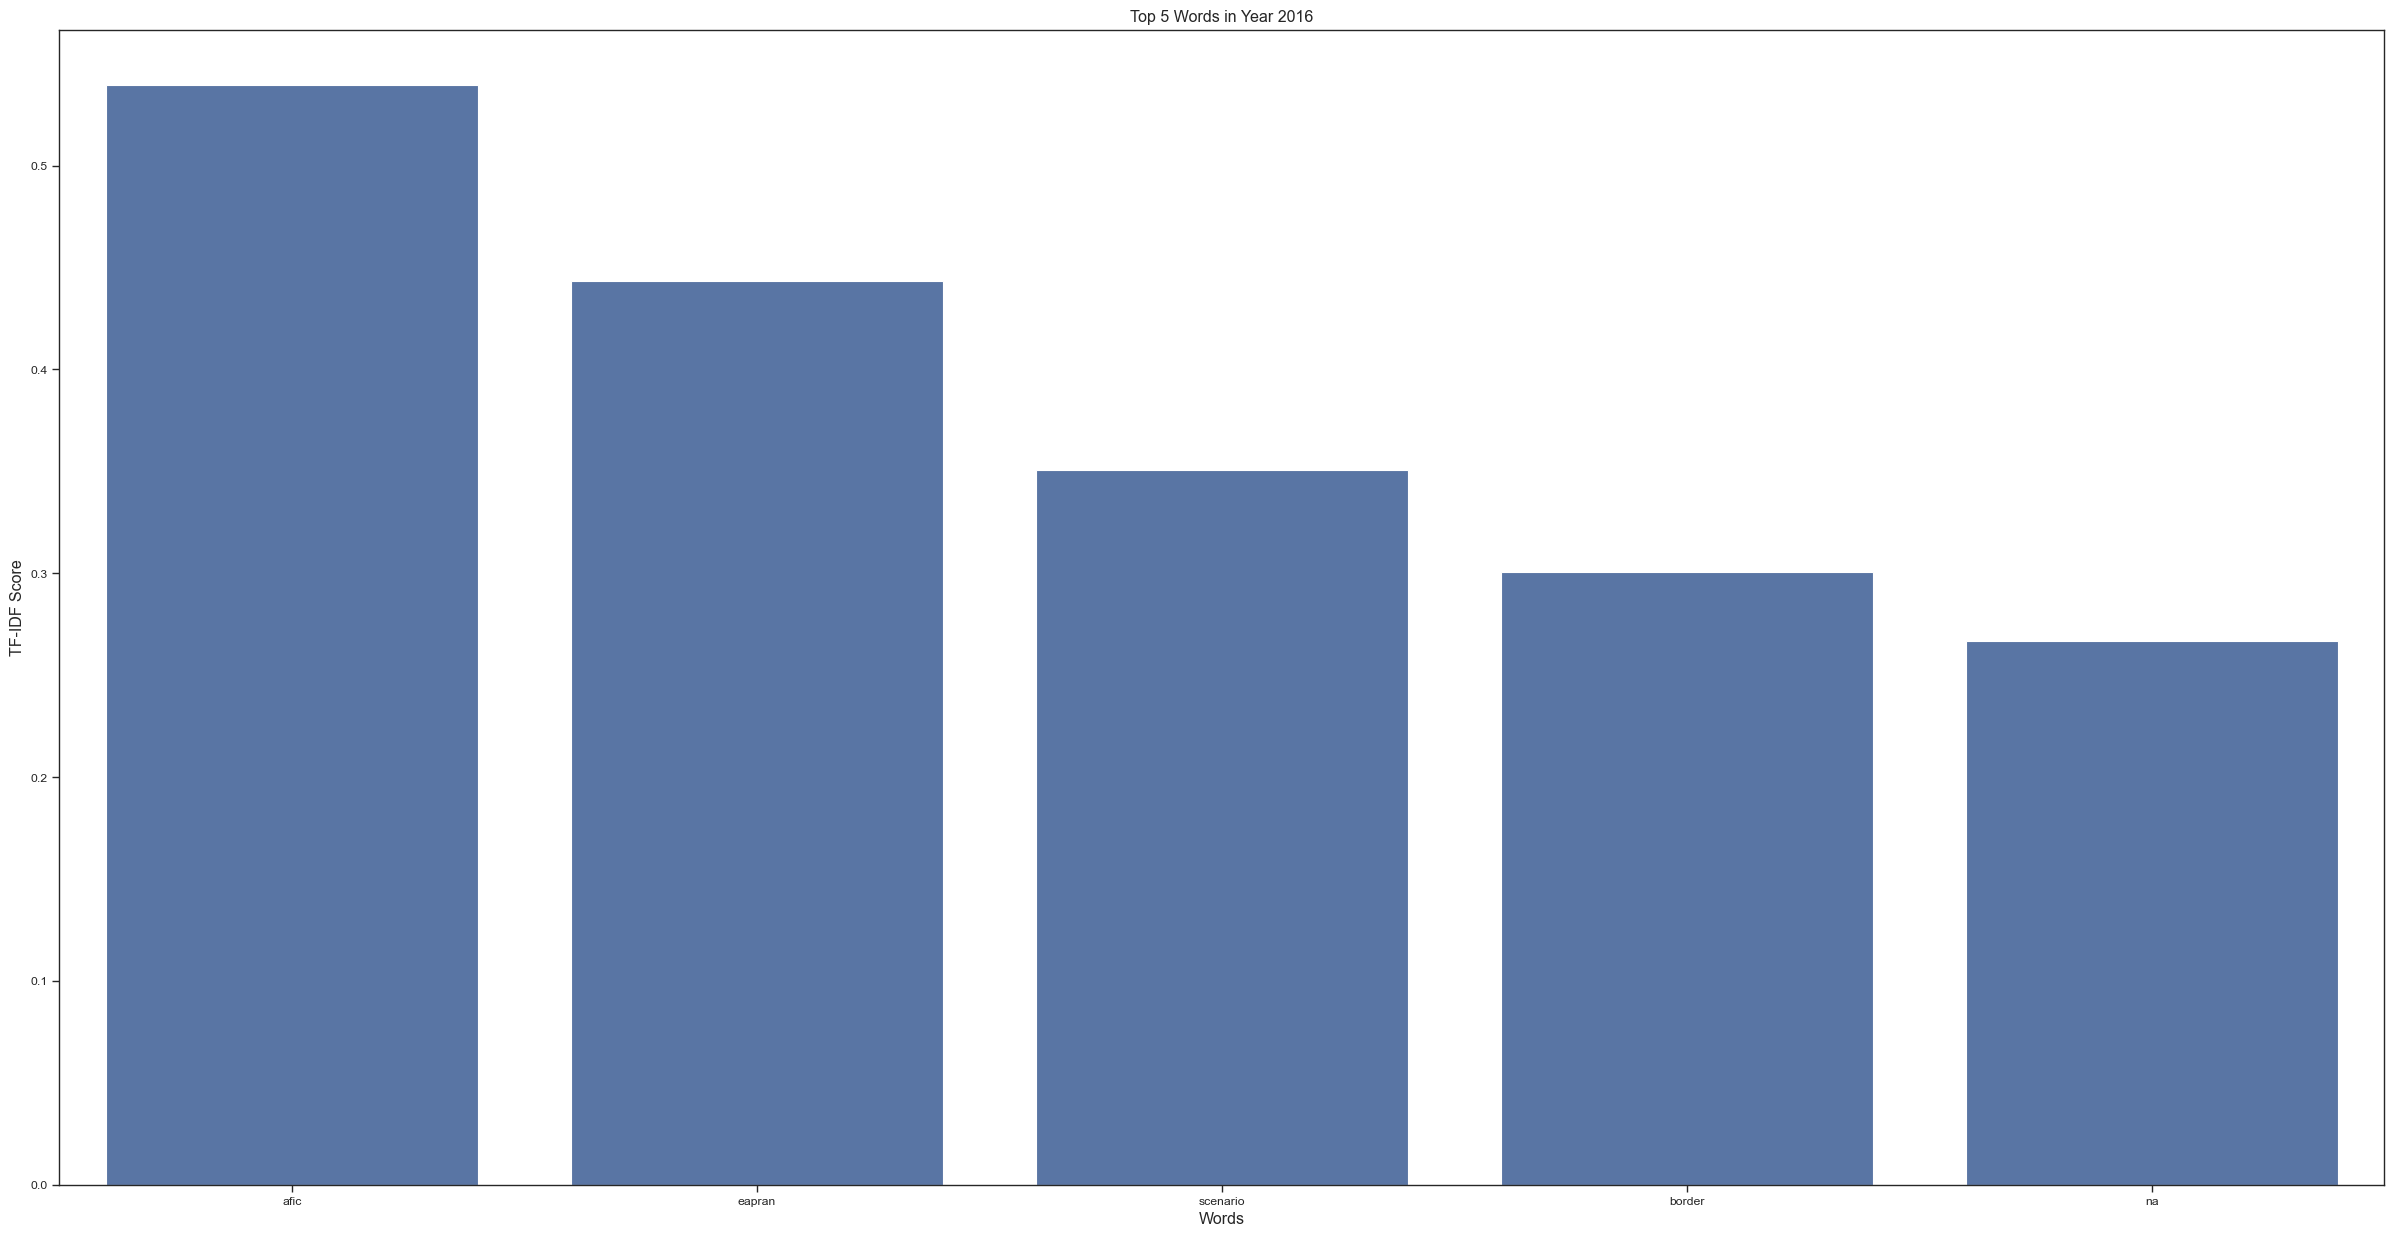

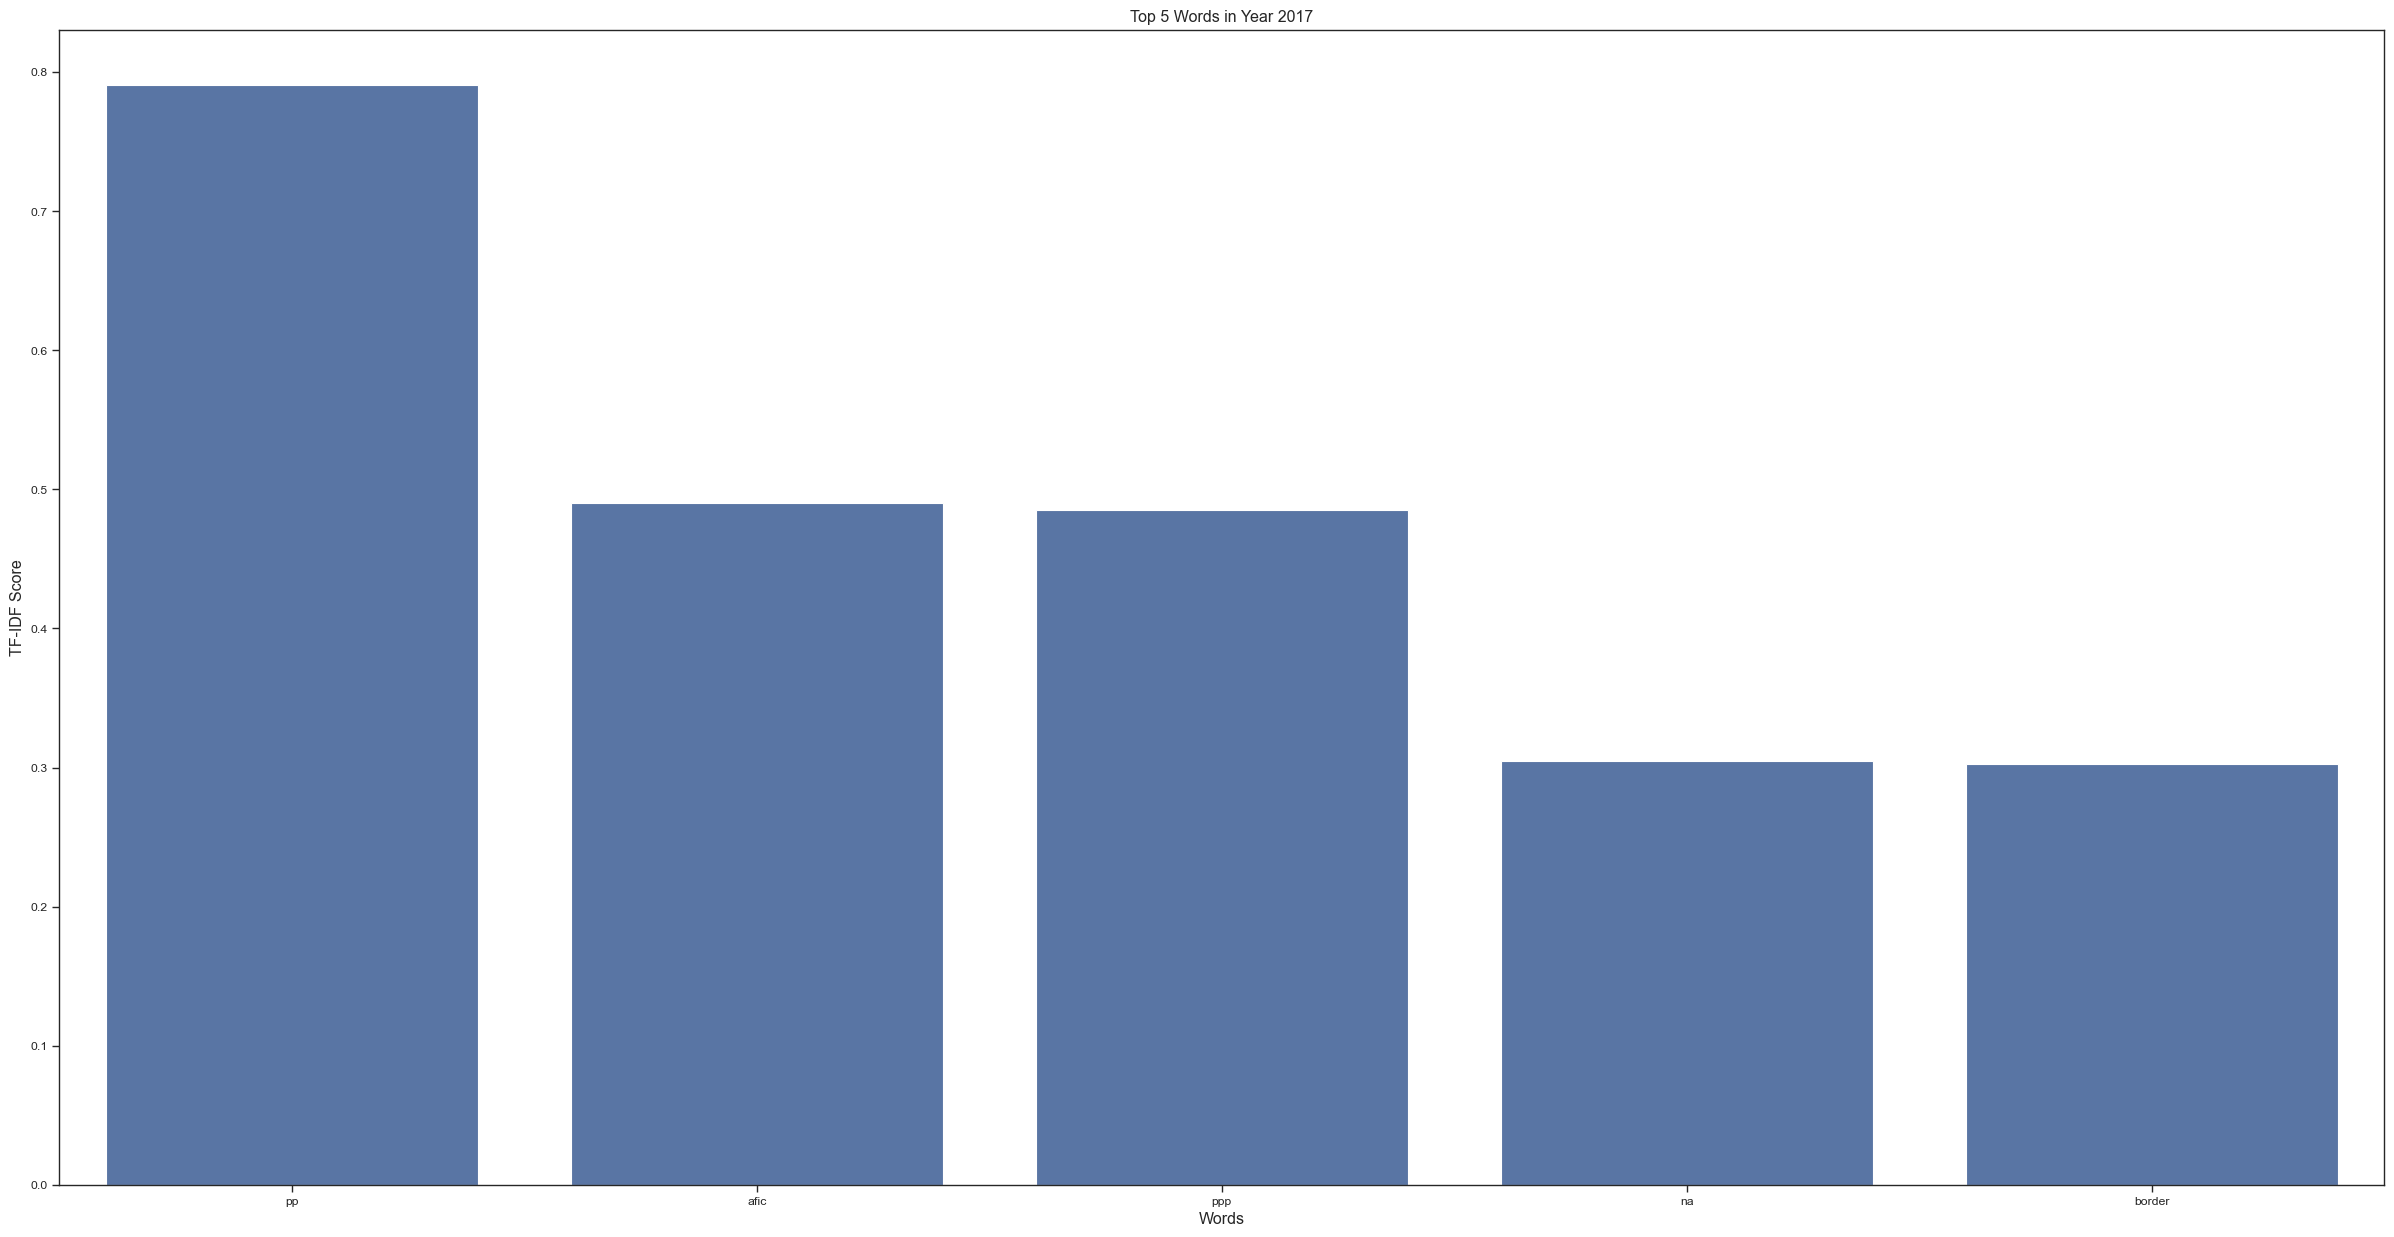

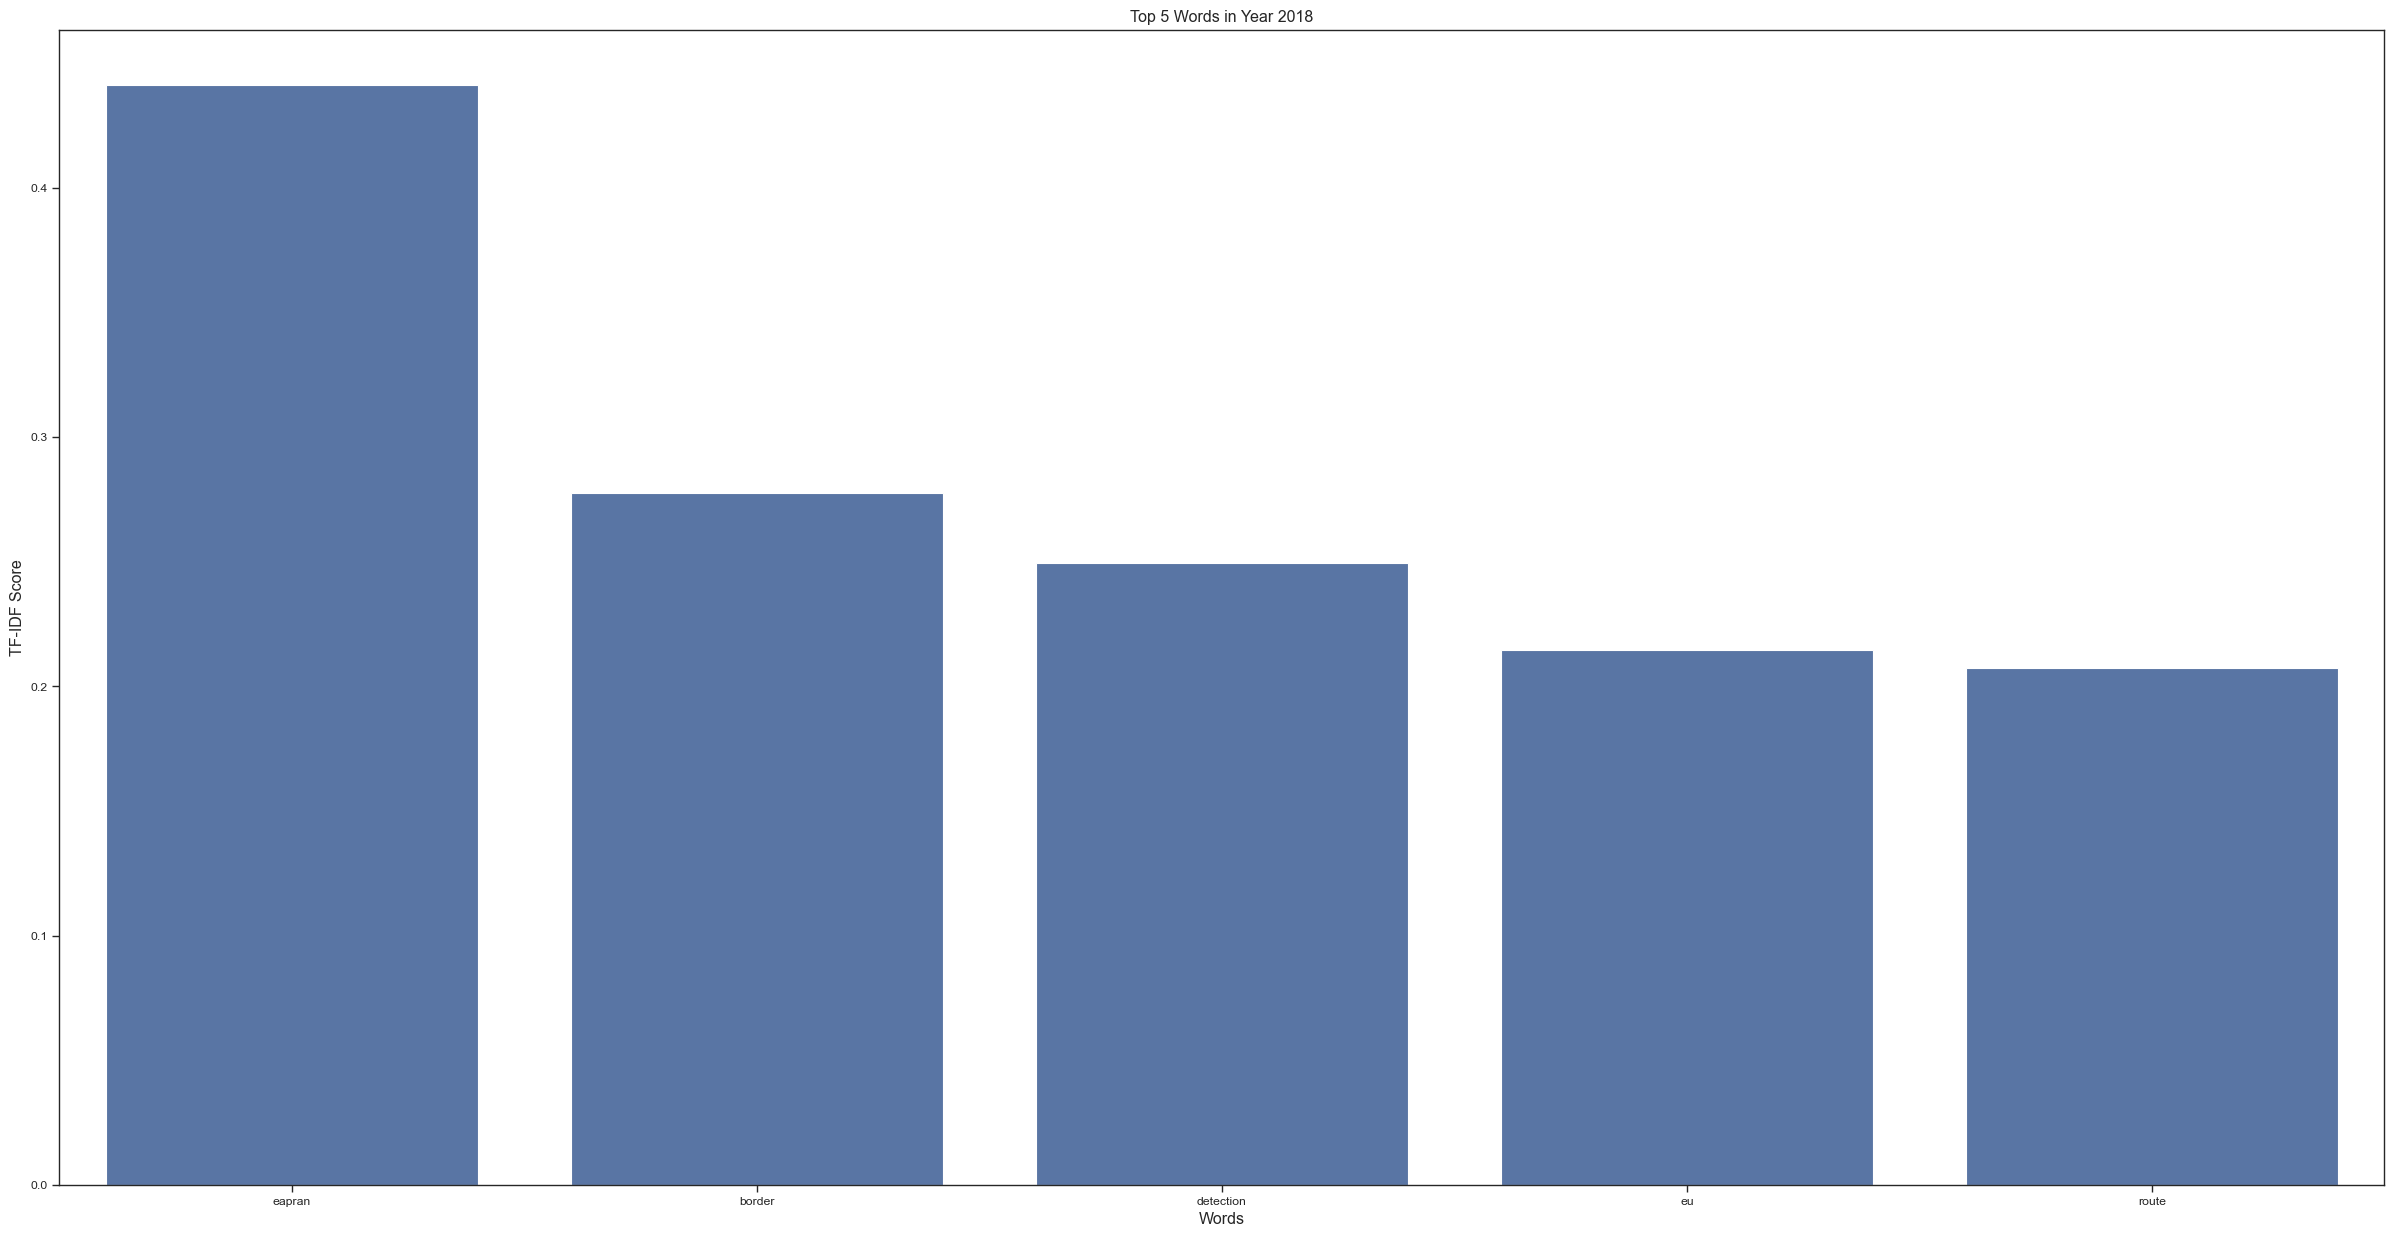

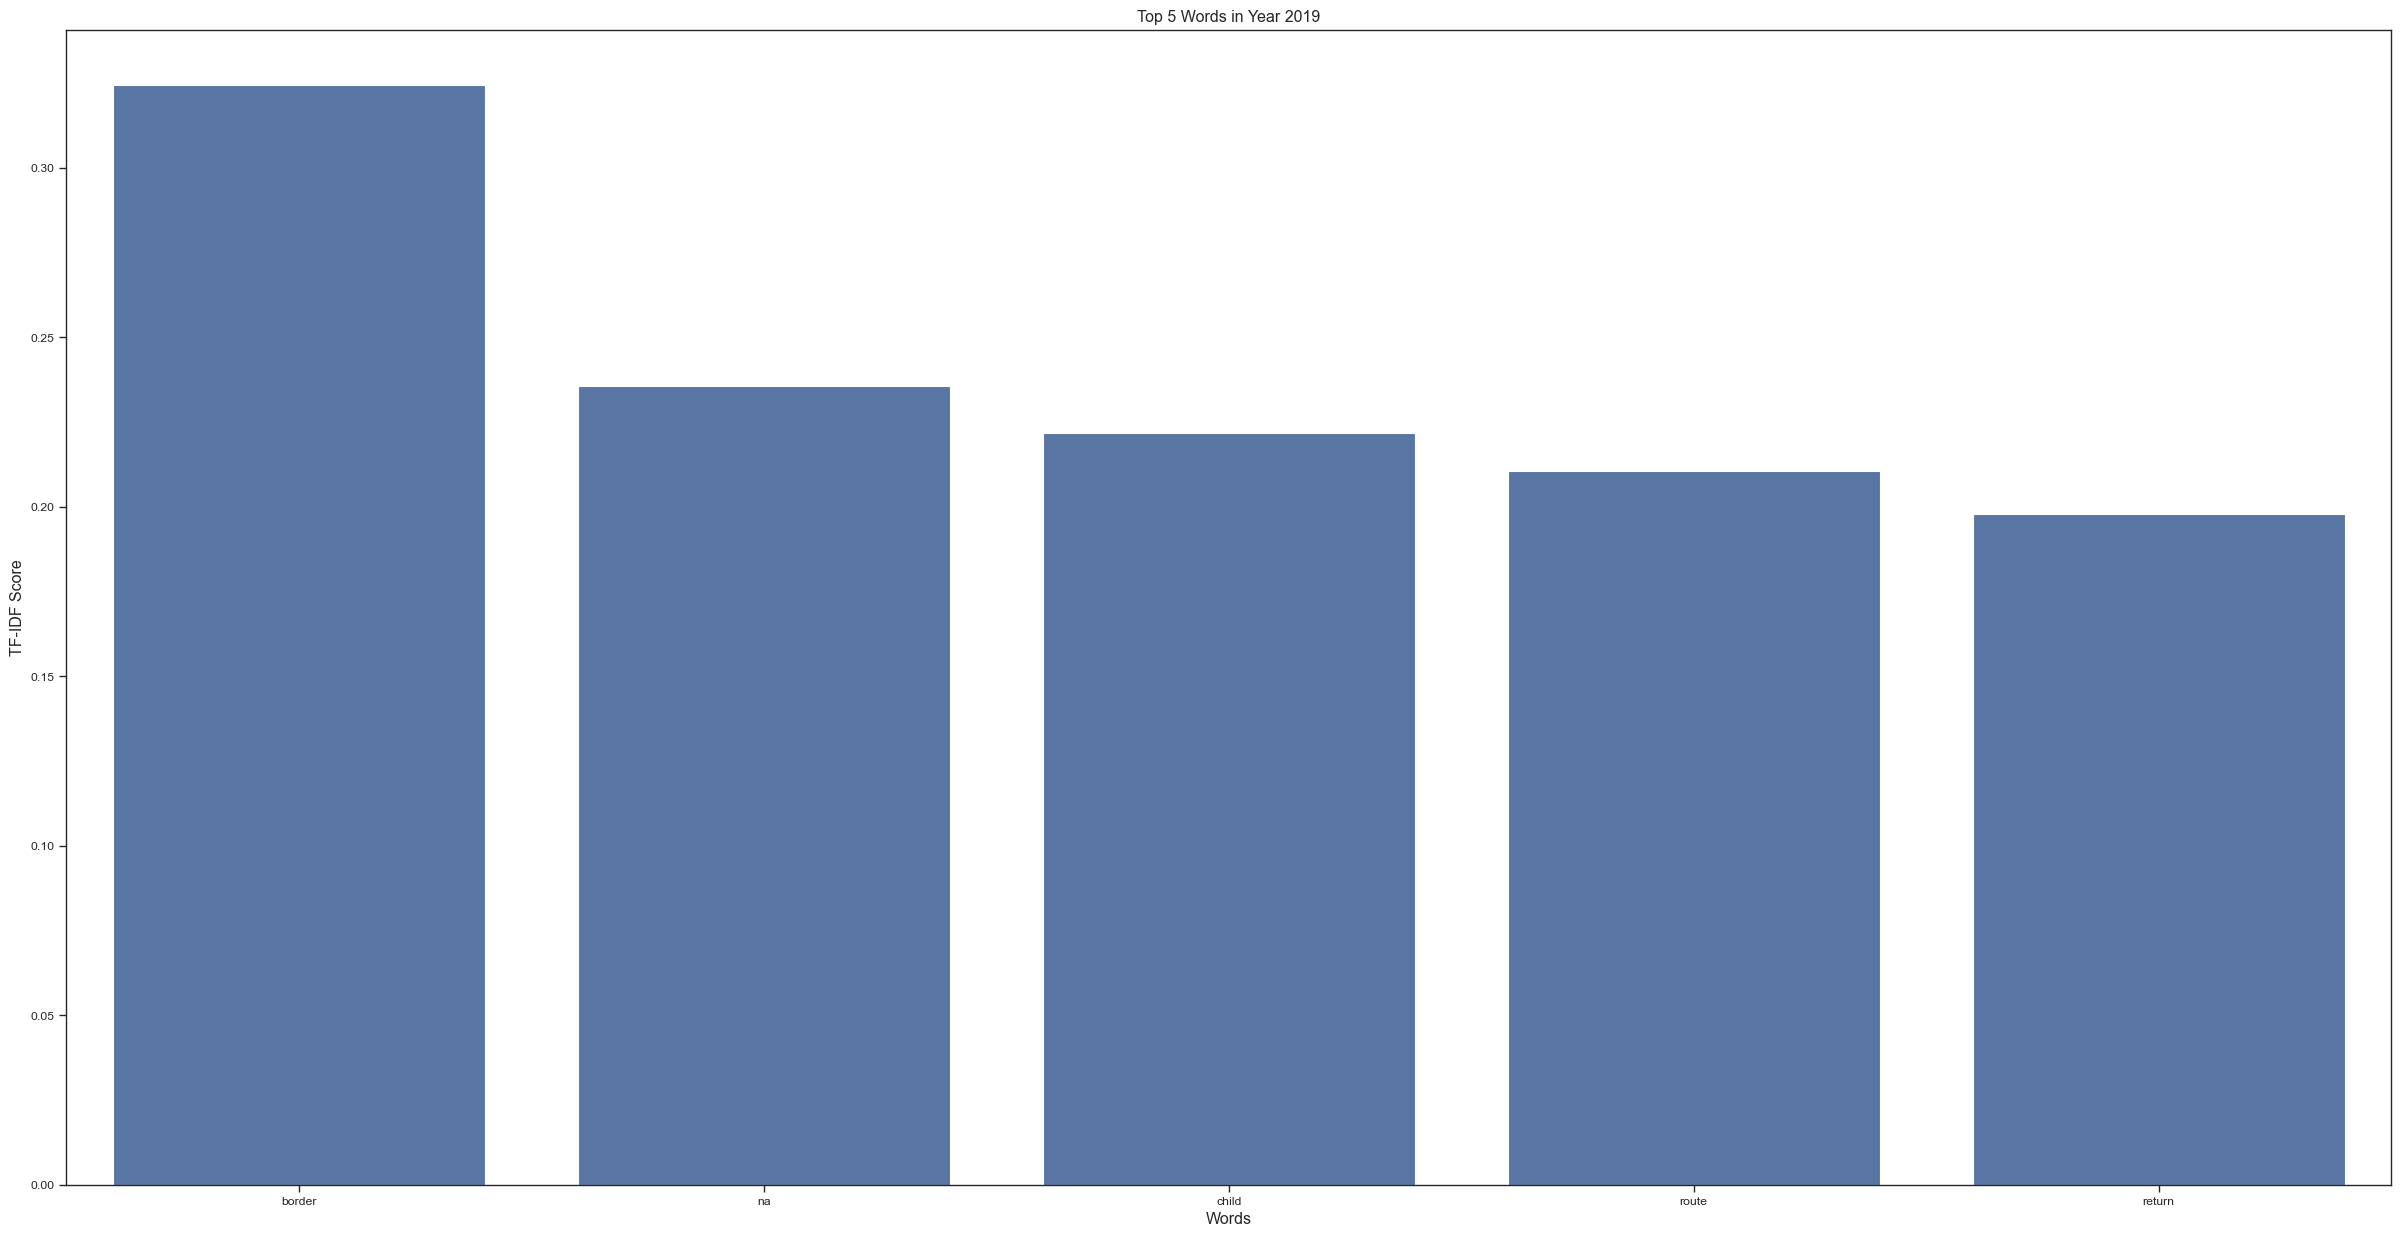

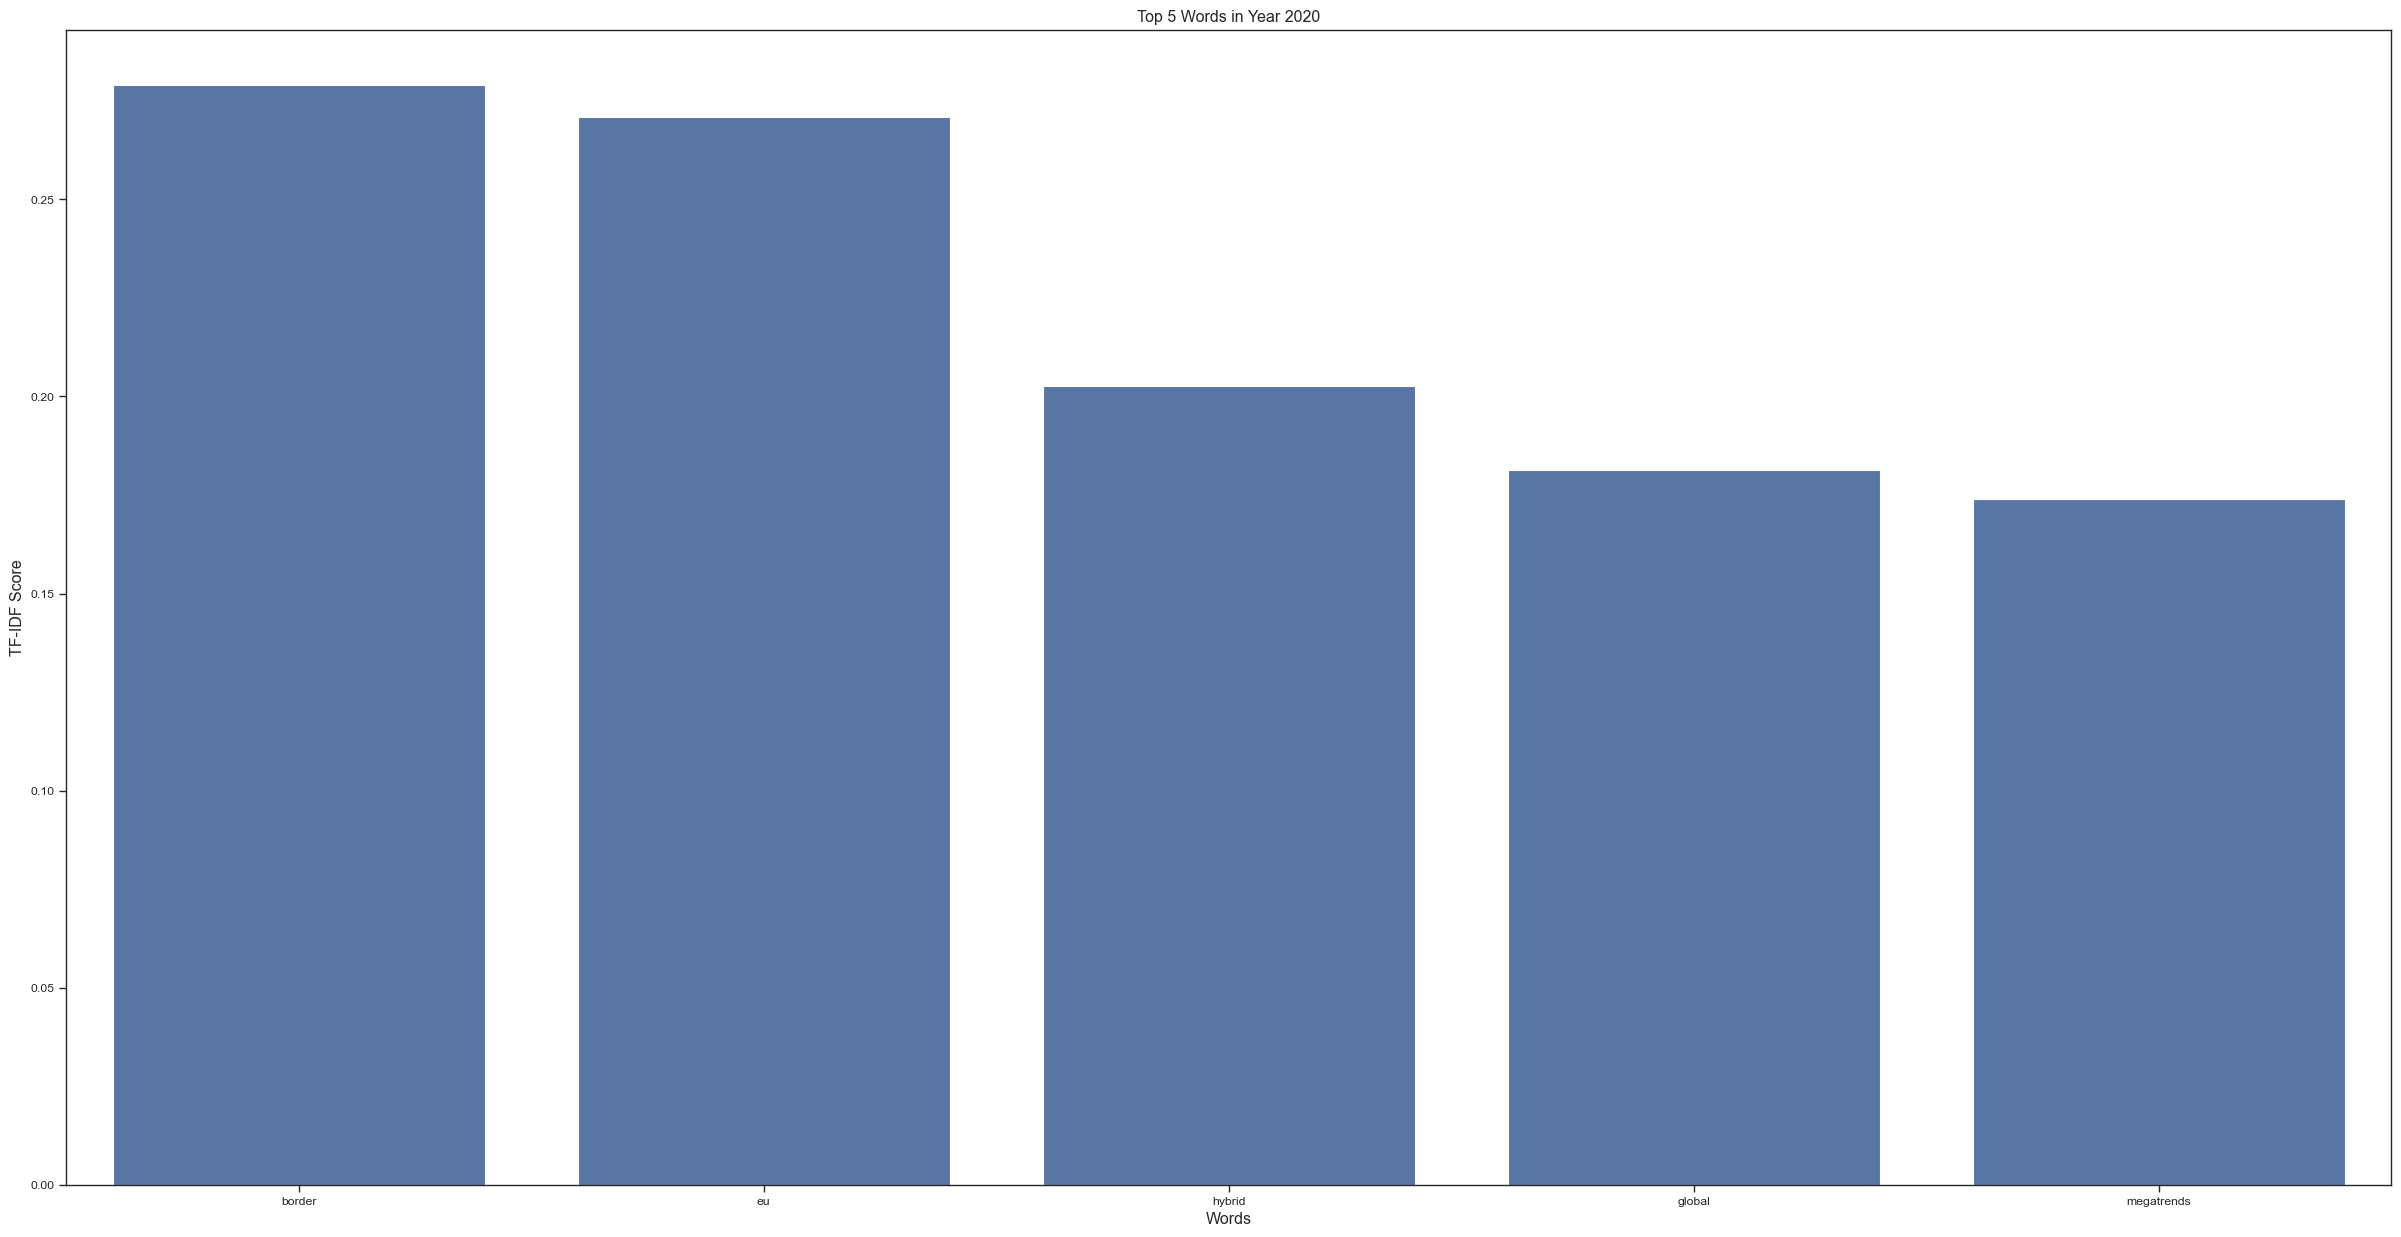

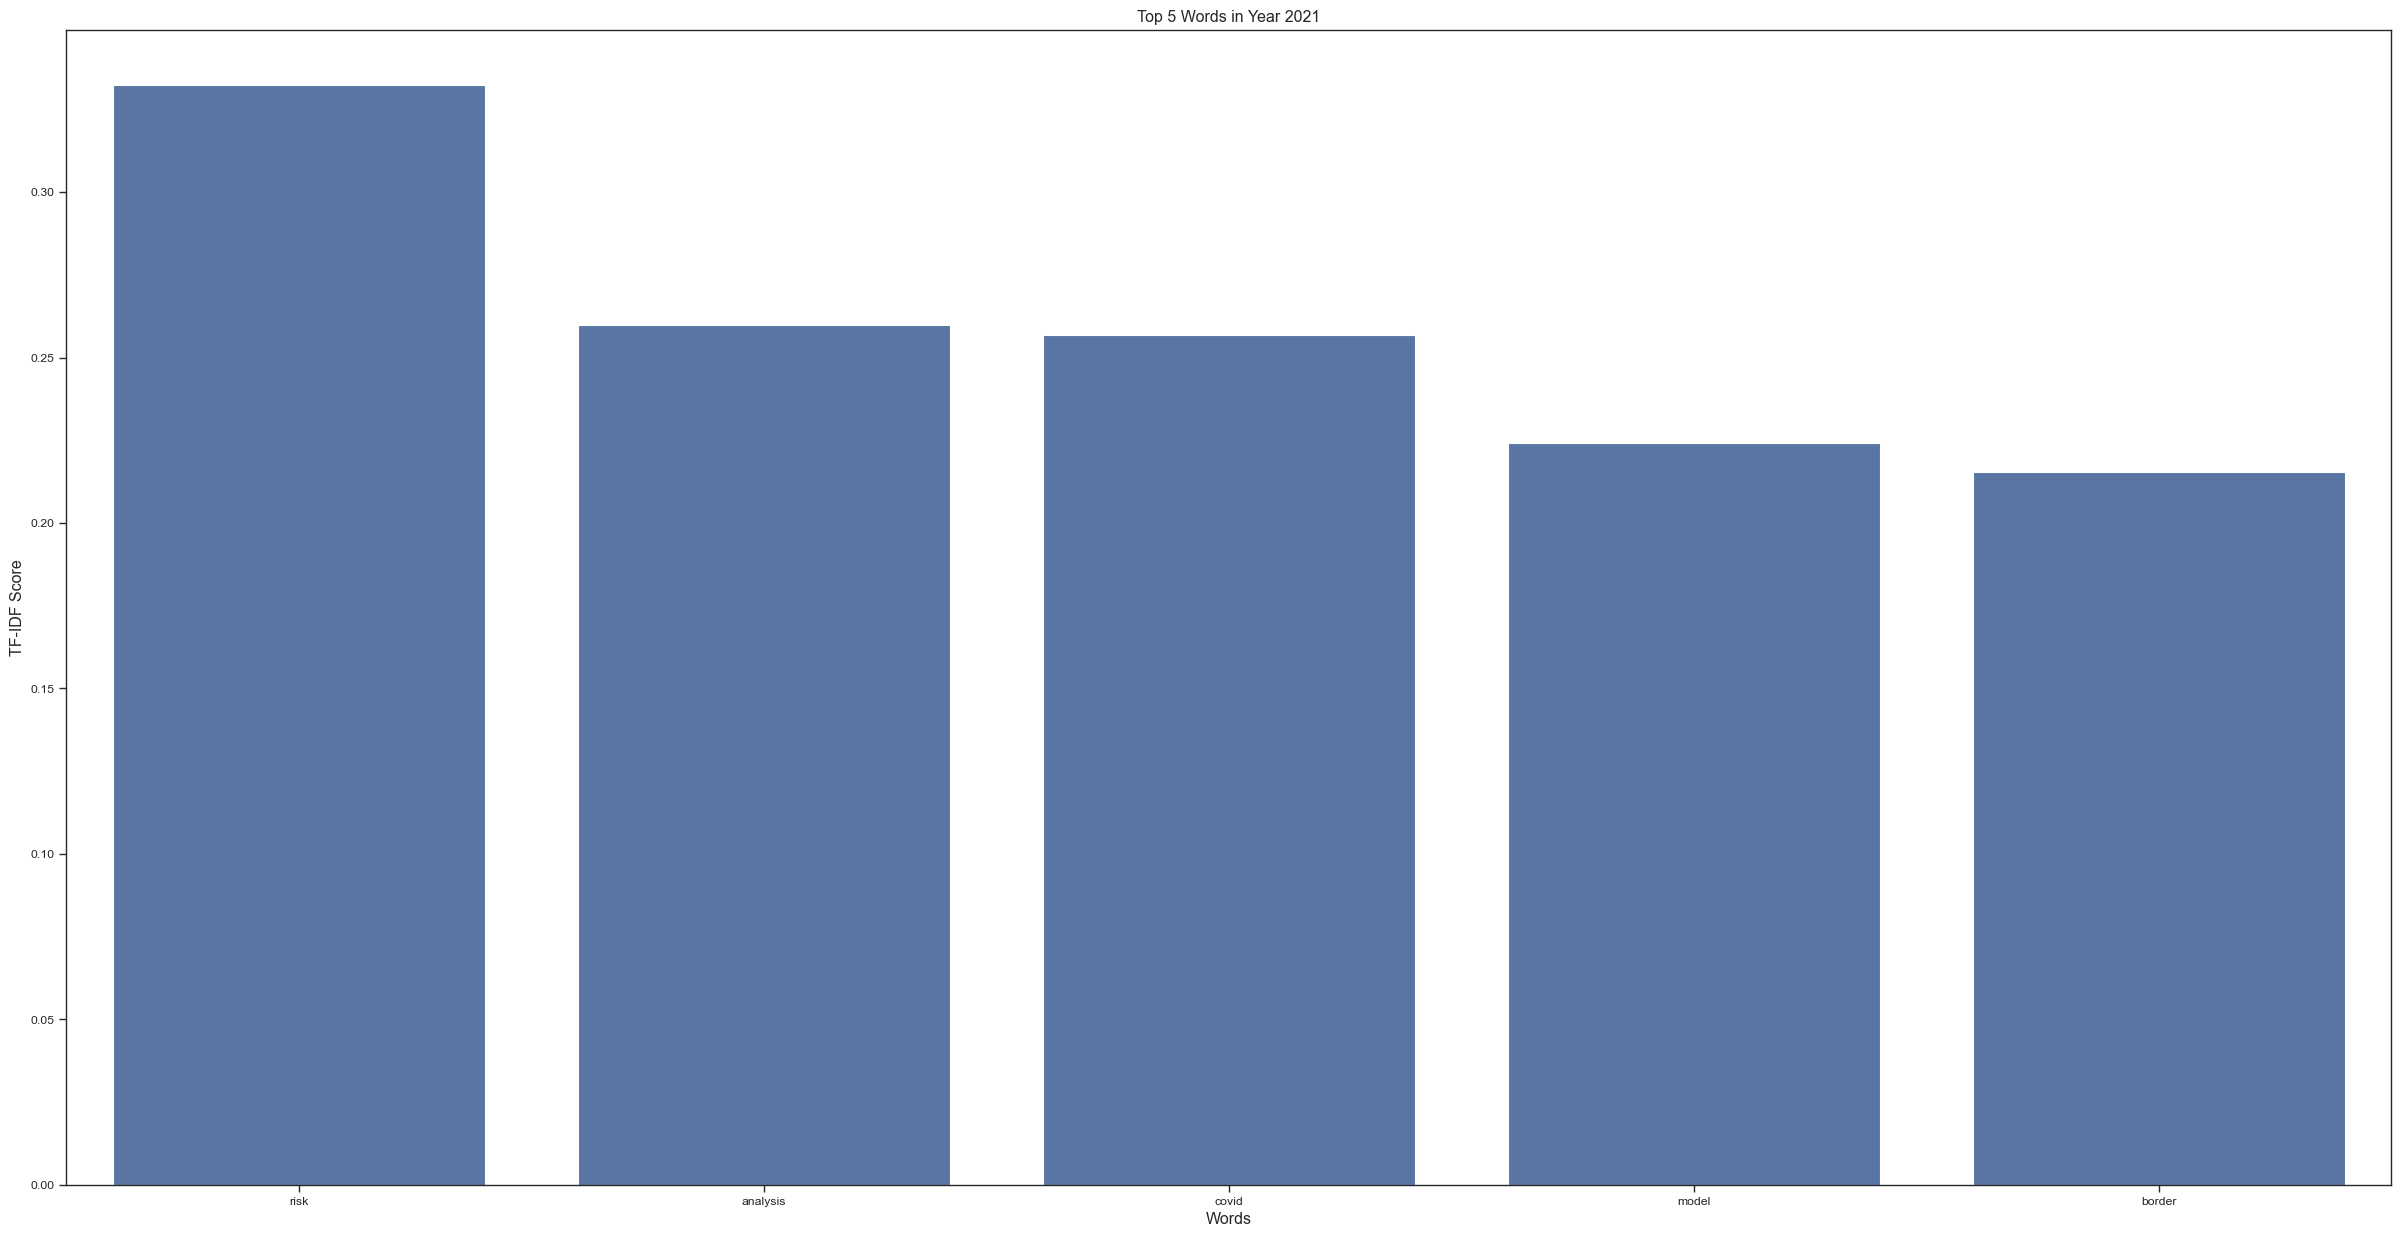

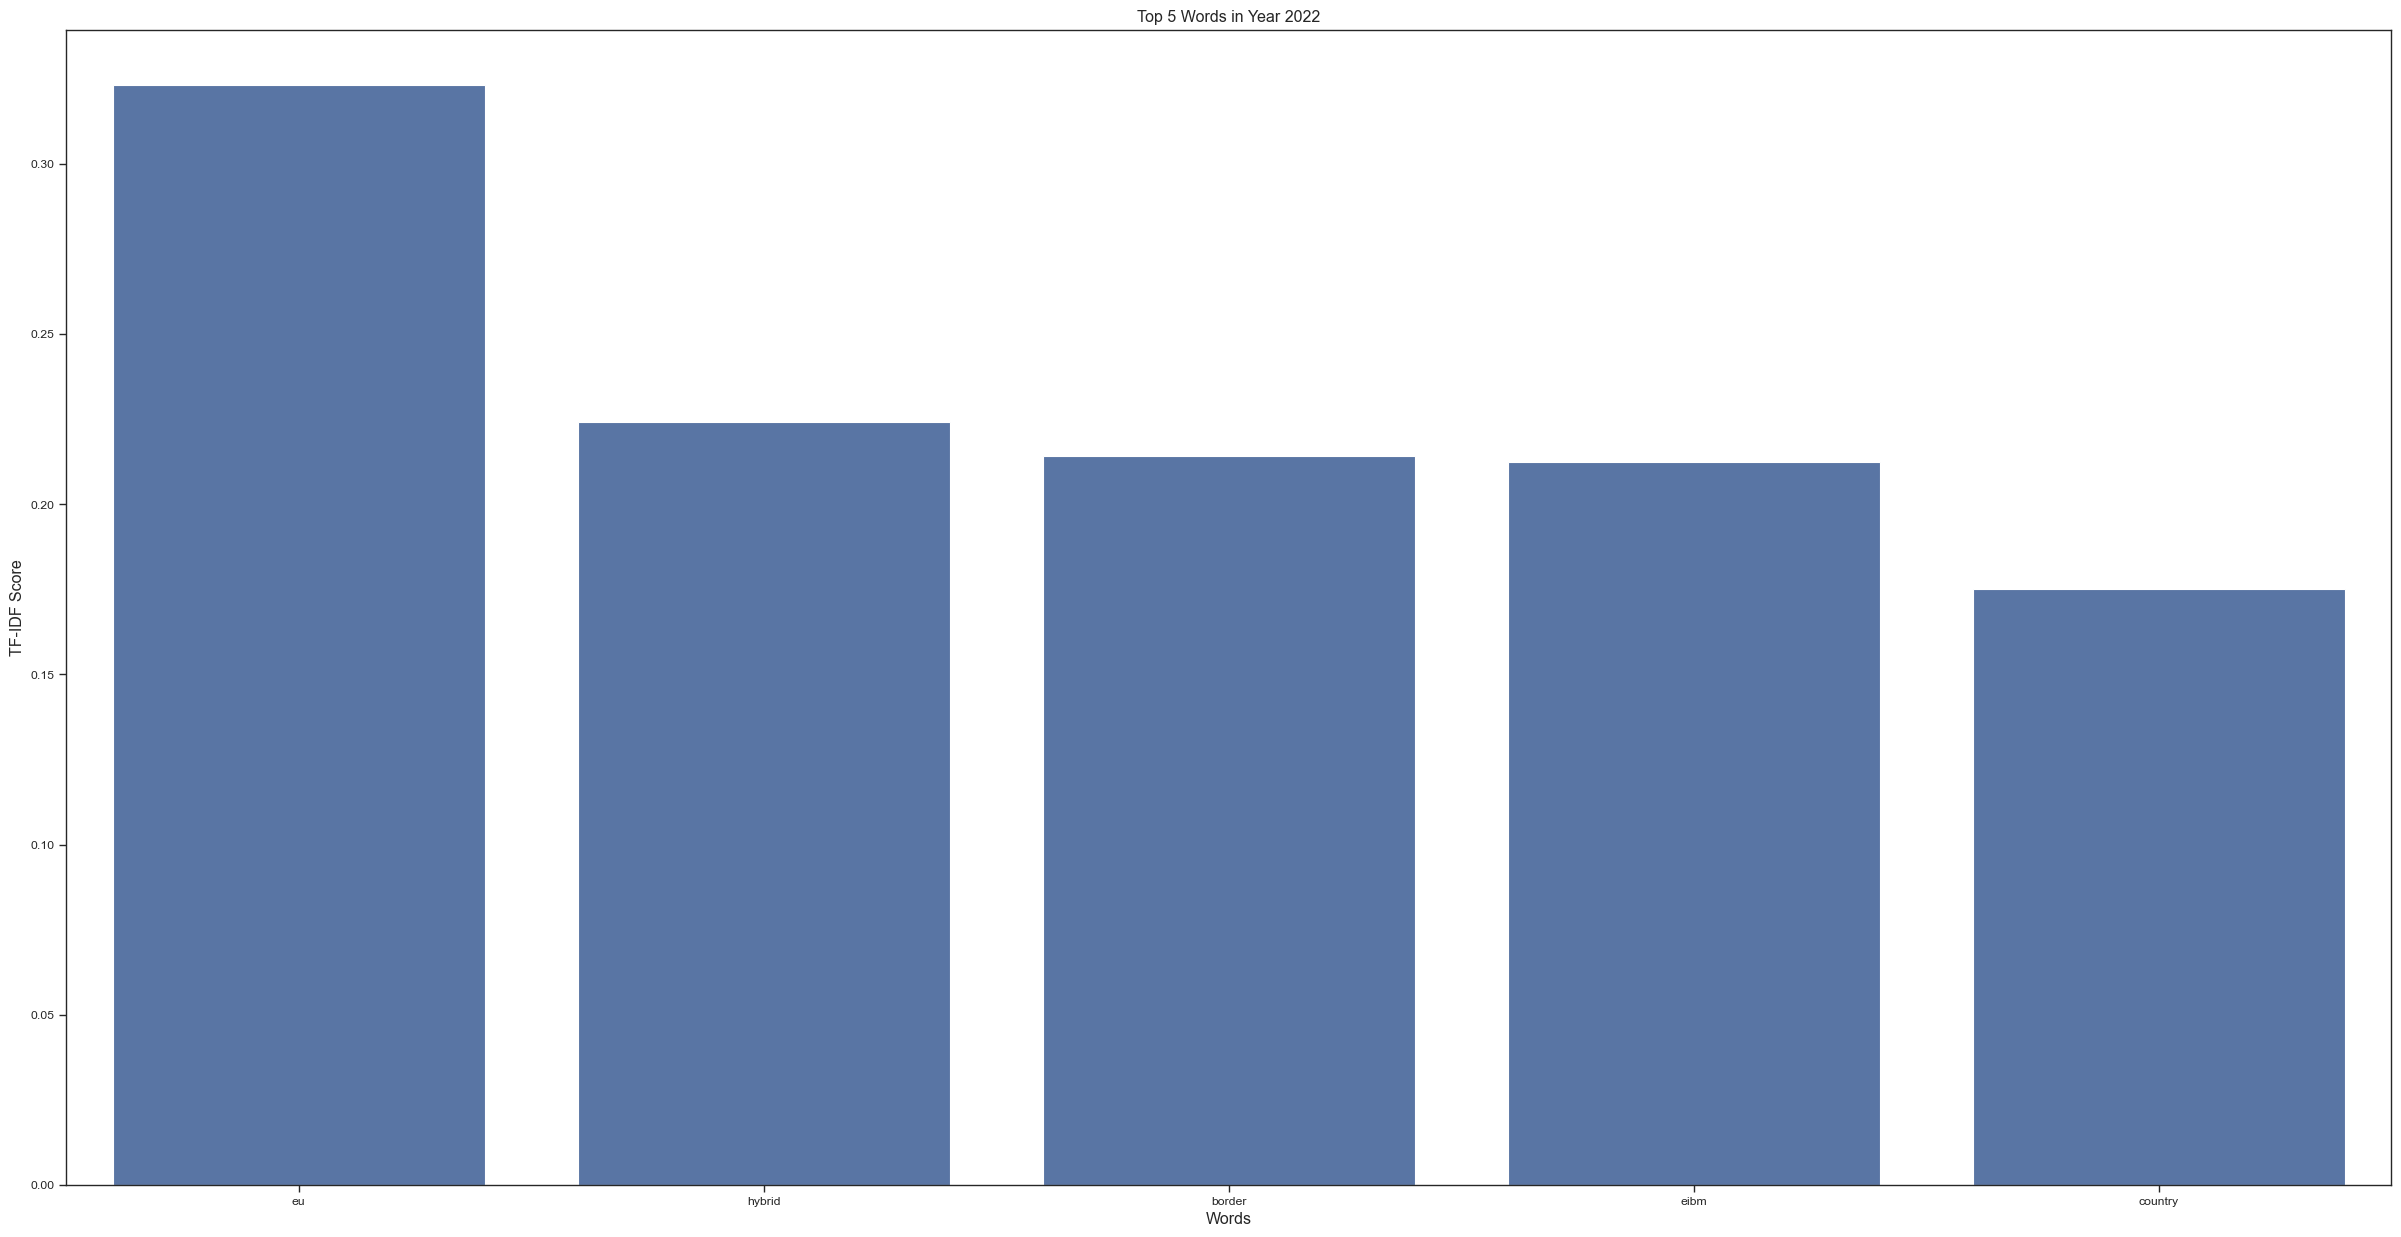

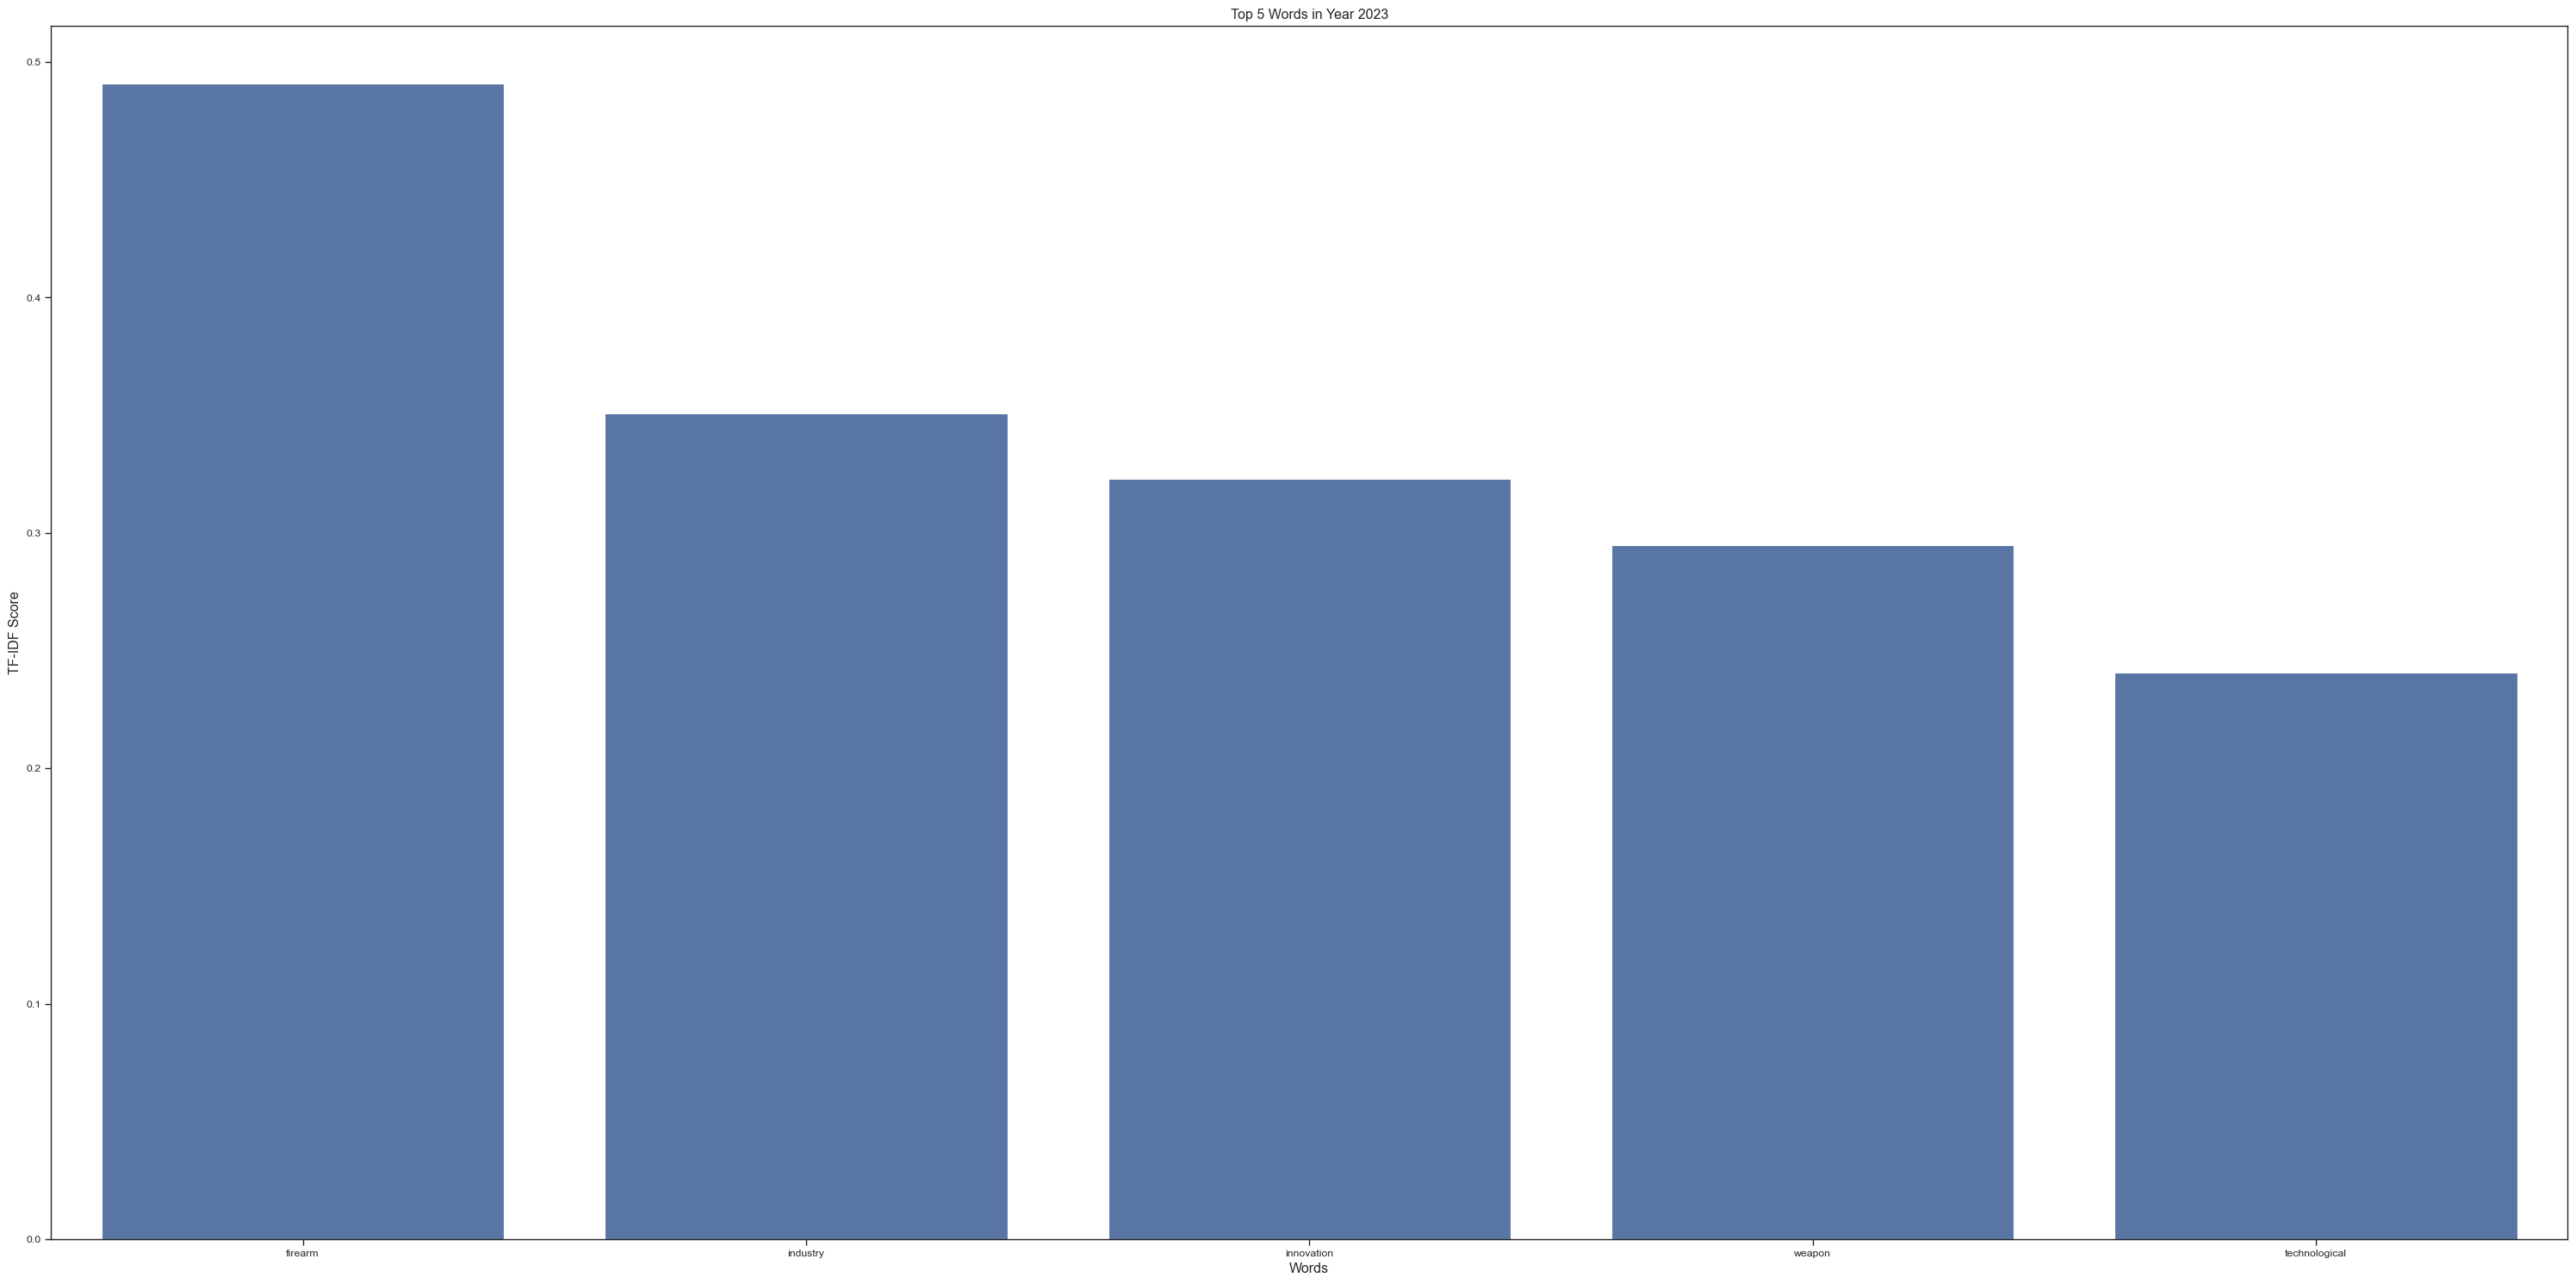

In [7]:
# Prepare an empty DataFrame for all data
all_data_year = pd.DataFrame(columns=['Year', 'Words', 'TF-IDF Score'])
# Group by 'year' and concatenate all TF-IDF tuples
grouped_year = df.groupby('Year')['Top 10 TF-IDF Words'].sum()

# Convert grouped_year.items() to a list of tuples
grouped_year_items = list(grouped_year.items())

for i, (year, tfidf_tuples_str) in enumerate(grouped_year_items):
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Year': [year]*len(words), 'Words': words, 'TF-IDF Score': scores})
        # Append data to all_data
        all_data_year = pd.concat([all_data_year, data], ignore_index=True)
        
        # Create a new figure for each year
        plt.figure(i)
        
        # Plot using seaborn
        sns.barplot(x='Words', y='TF-IDF Score', data=data)
        plt.title(f'Top 5 Words in Year {year}')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

#### Heatmap - Years

In [8]:
all_data_year

,Year,Words,TF-IDF Score
0,2010,unaccompanied,0.565305
1,2010,minor,0.510892
2,2010,border,0.351970
3,2010,eu,0.289699
4,2010,irregular,0.289578
...,...,...,...
65,2023,firearm,0.490828
66,2023,industry,0.350818
67,2023,innovation,0.322828
68,2023,weapon,0.294991


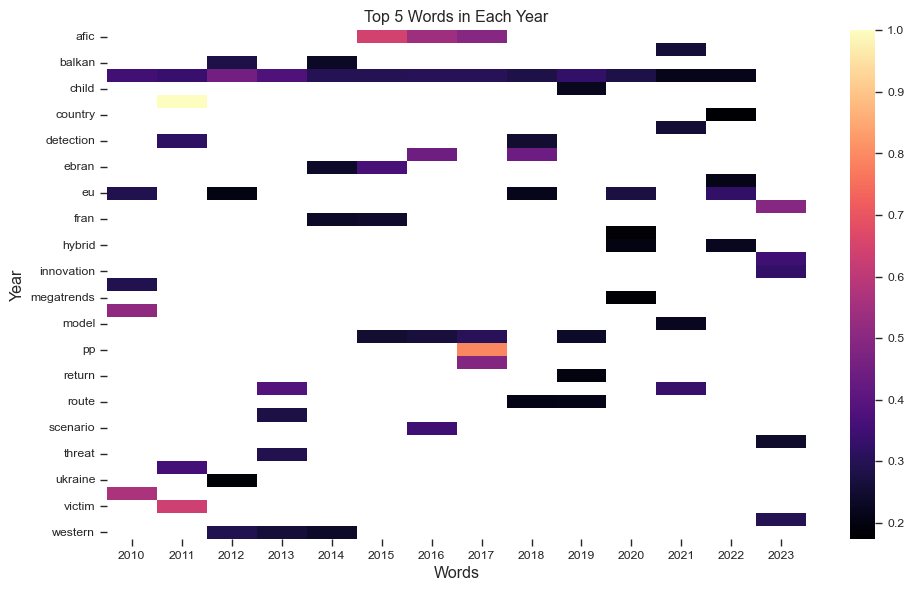

In [11]:
# Pivot the data for the heatmap
heatmap_data = all_data_year.pivot(index='Words', columns='Year', values='TF-IDF Score')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='magma')
plt.title('Top 5 Words in Each Year')
plt.xlabel('Words')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

## Word2Vec Analysis

In [12]:
#load word2vec model from models folder
model = Word2Vec.load('../model/word2vec_model.model')